<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C4/02_Visualizaciones_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 3: Introducción a GGplot2

**Profesor:** Rodrigo Morales<br>
**E-mail:** rumorale1@gmail.com

Ggplot es una librería basada en la gramática de gráficos, creadapor Wilkinson (2015). Básicamente la gramática de gráficos nos dice que un gráfico estadístico corresponde a un mapeo entre la data hacia atributos estéticos (como el color, forma o tamaño) de objetos geométricos (como puntos, líneas o barras).

## Referencias útiles

 * https://ggplot2.tidyverse.org/reference/index.html
 * https://r4ds.had.co.nz/data-visualisation.html
 * https://www.rdocumentation.org/packages/ggplot2/versions/3.3.0
 * https://r-graph-gallery.com/
* https://shiny.posit.co/r/gallery/


## Cheatsheets
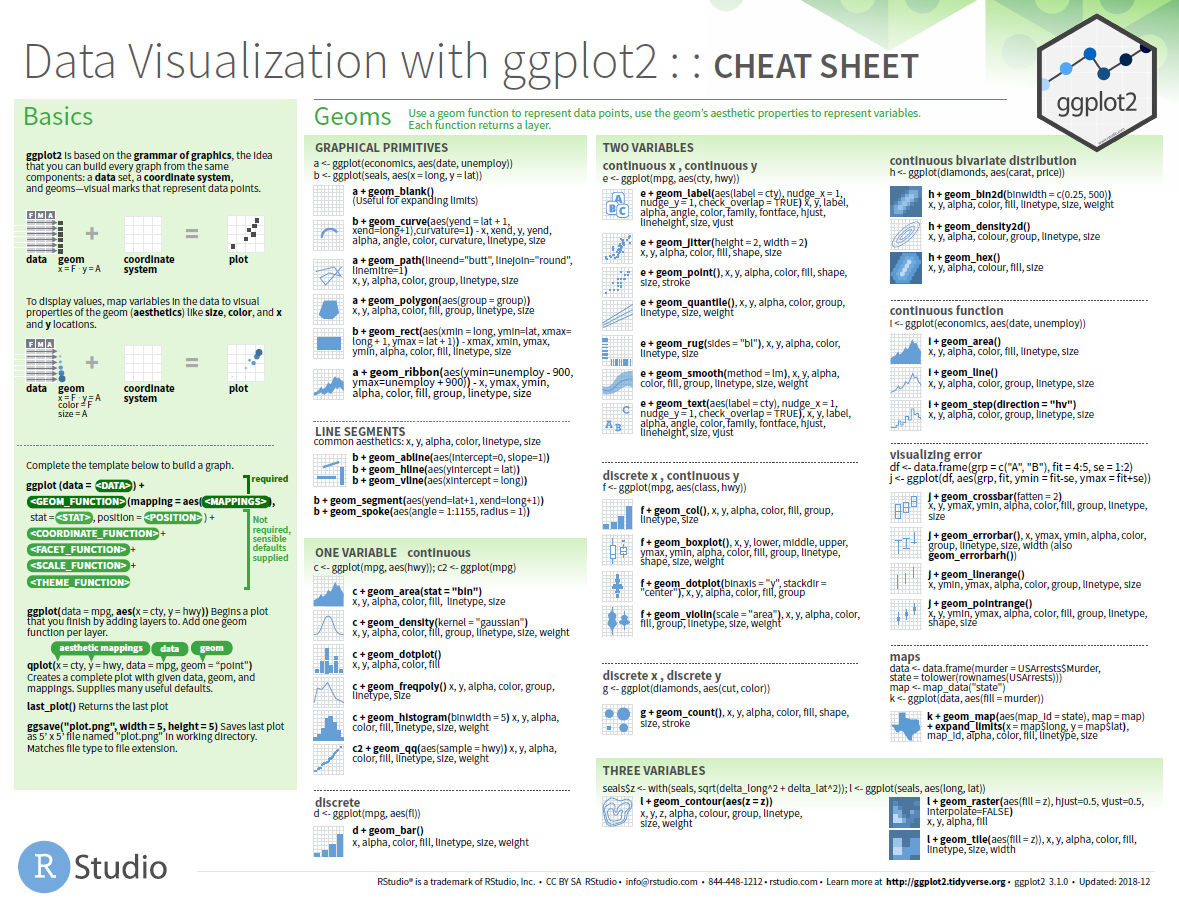


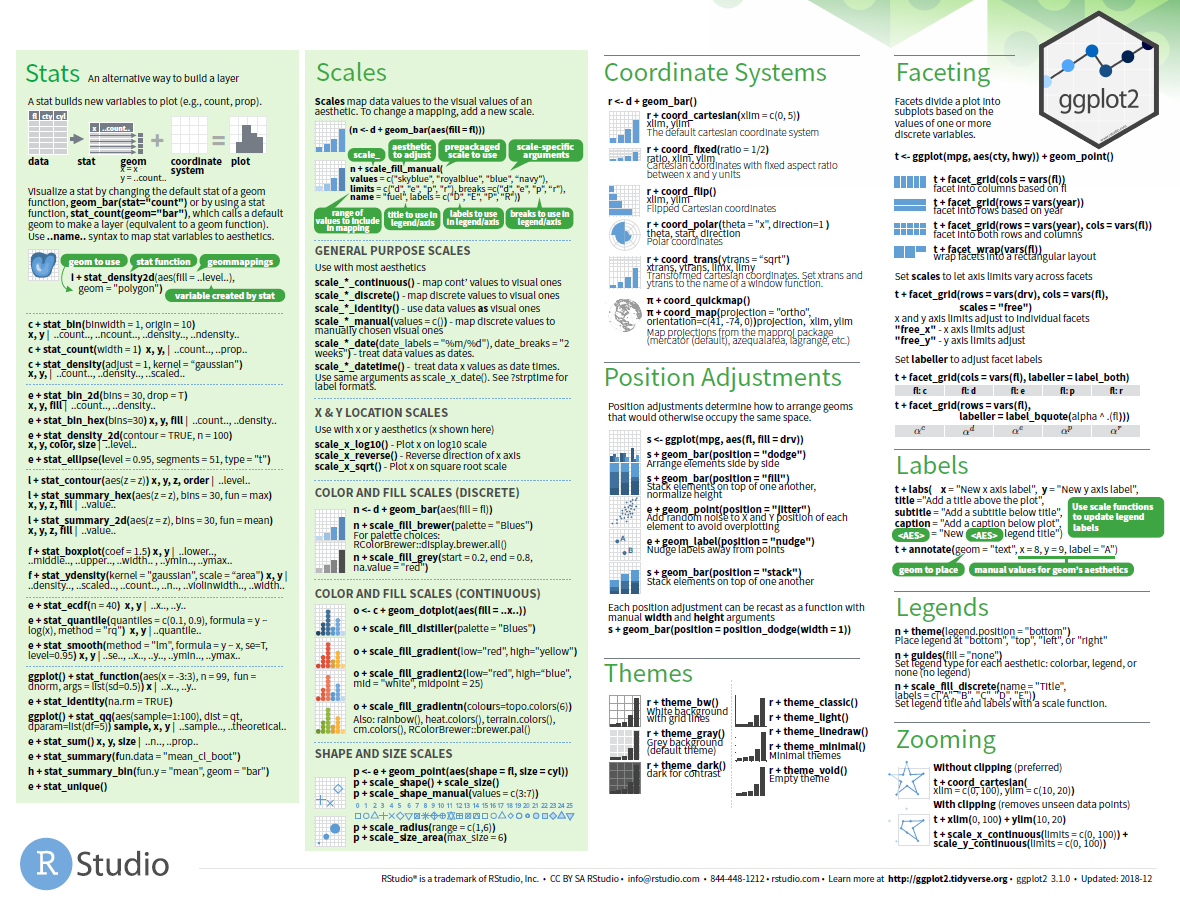


## ¿Qué es ggplot2?

ggplot2 es el paquete de R que permite crear gráficos por capas.
La idea central es ir agregando elementos (datos, estética, geometrías, títulos, temas, etc.) uno sobre otro, como si “dibujaras” paso a paso.

## Estructura básica

```
ggplot(data = <DATA>, aes(x = <X>, y = <Y>)) +
  geom_<TIPO_DE_GRAFICO>()

```

- `data` → el conjunto de datos que vas a graficar (por ejemplo, mpg, iris, mtcars).

- `aes()` → define la estética del gráfico: qué variable va en el eje x, cuál en y, y otras como color, size, shape, etc.

- `geom_`
 → define cómo se dibuja: puntos, líneas, barras, cajas, etc.



In [18]:
library(ggplot2)

Para entender el funcionamiento de esta grámatica comencemos con un ejemplo analizando la data mpg: Grafiquemos displ vs hwy

In [3]:
data(mpg)

In [9]:
mpg %>% head()

ERROR: Error in mpg %>% head(): could not find function "%>%"


In [13]:
?plot

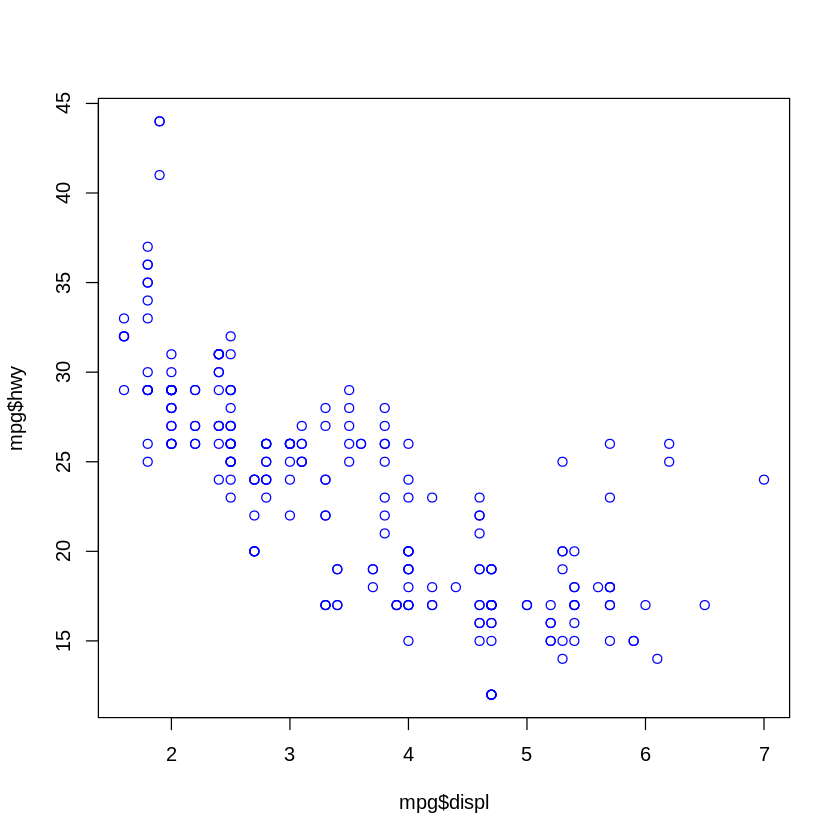

In [22]:
plot(mpg$displ, mpg$hwy, col = 'blue', type = "p")

Librería `base`

Librería `ggplot2`

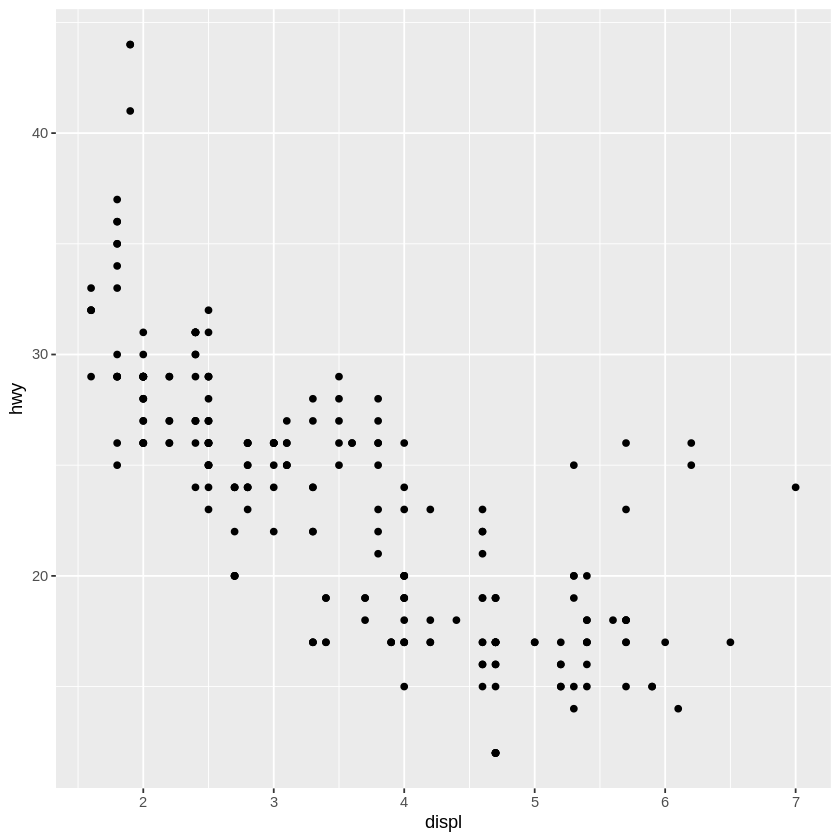

In [25]:
library(ggplot2)
library(dplyr)

# 1.- Inicialización
# 2.- Datos
# 3.- tipo grafico

ggplot(data=mpg, aes(x = displ, y = hwy)) +
  geom_point()



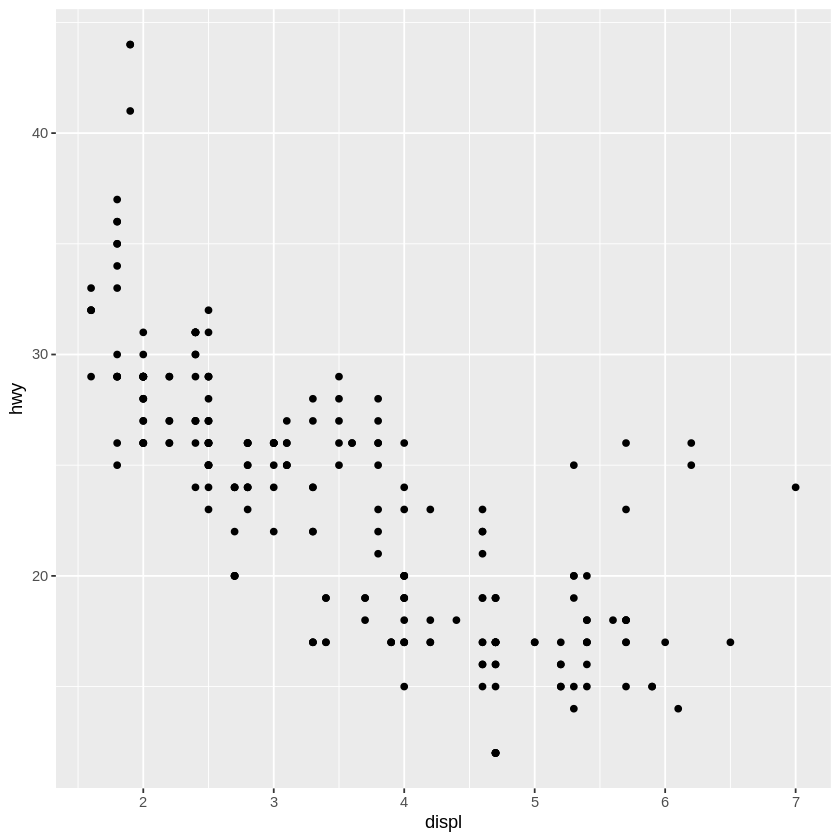

In [28]:
mpg %>%
ggplot() +
aes(x = displ, y = hwy) +
  geom_point()

In [ ]:
# tambien podemos generar el gráfico de la siguiente manera (aes( como parámetro mapping))


# I. Color, tamaño, forma y otros atributos estéticos

## I.1. Color
El color está dado por la variable categórica class (notar que es lo mismo si incluimos el parámetro color, colour o col. ggplot automáticamente entiende lo que queremos :) )

In [30]:
mpg %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


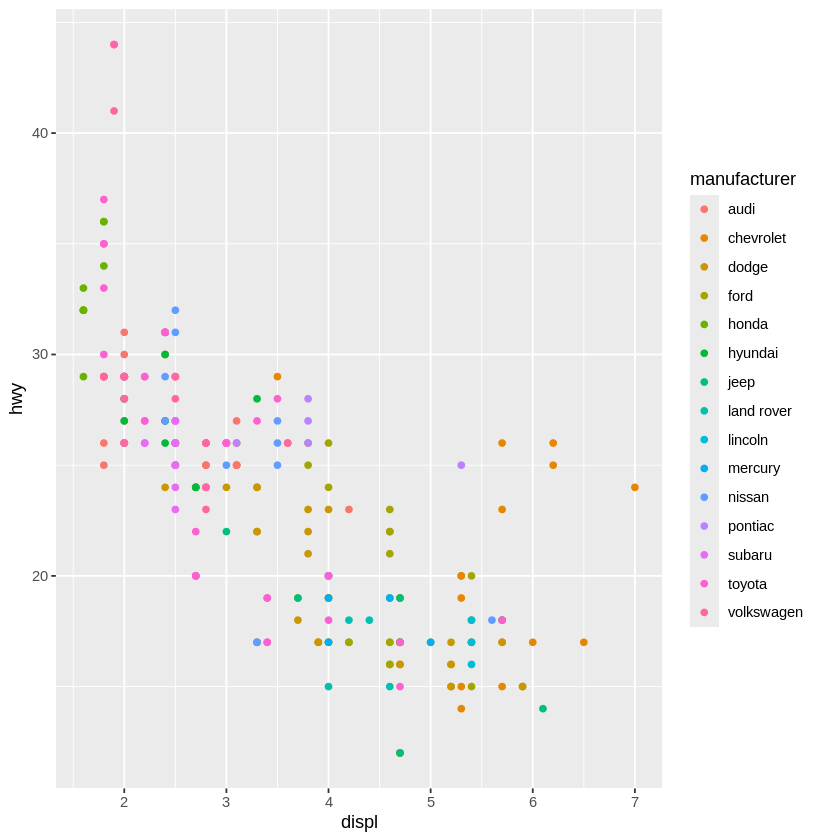

In [34]:
## Color por "class" dentro de aes
mpg %>%
ggplot(aes(x = displ, y = hwy, colour = manufacturer)) +
  geom_point()

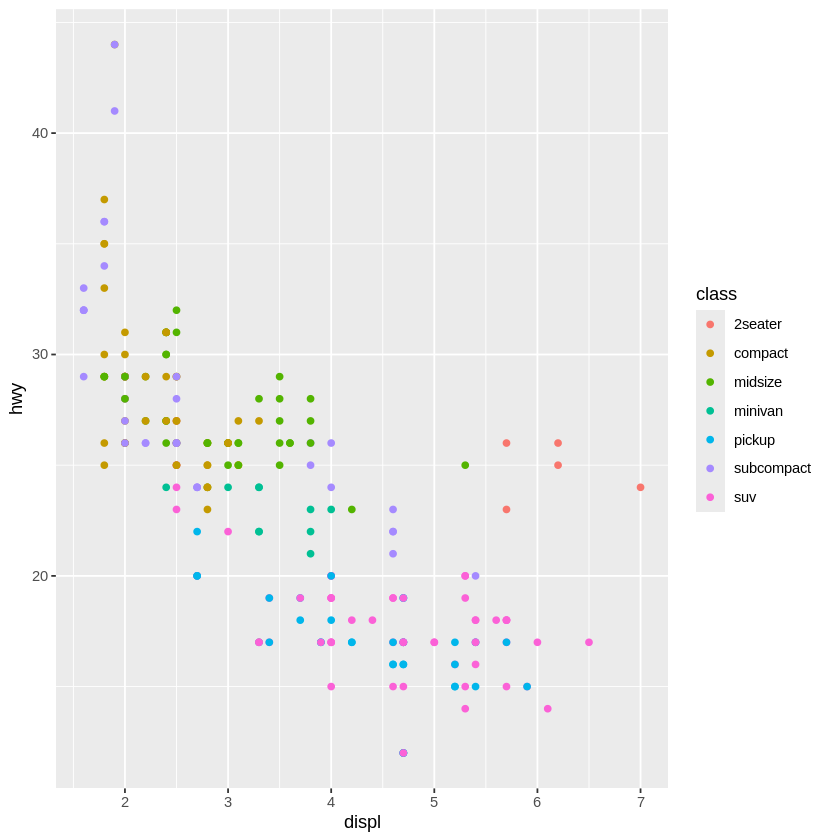

In [35]:
mpg %>%
ggplot(aes(x = displ, y = hwy, colour = class)) +
  geom_point()

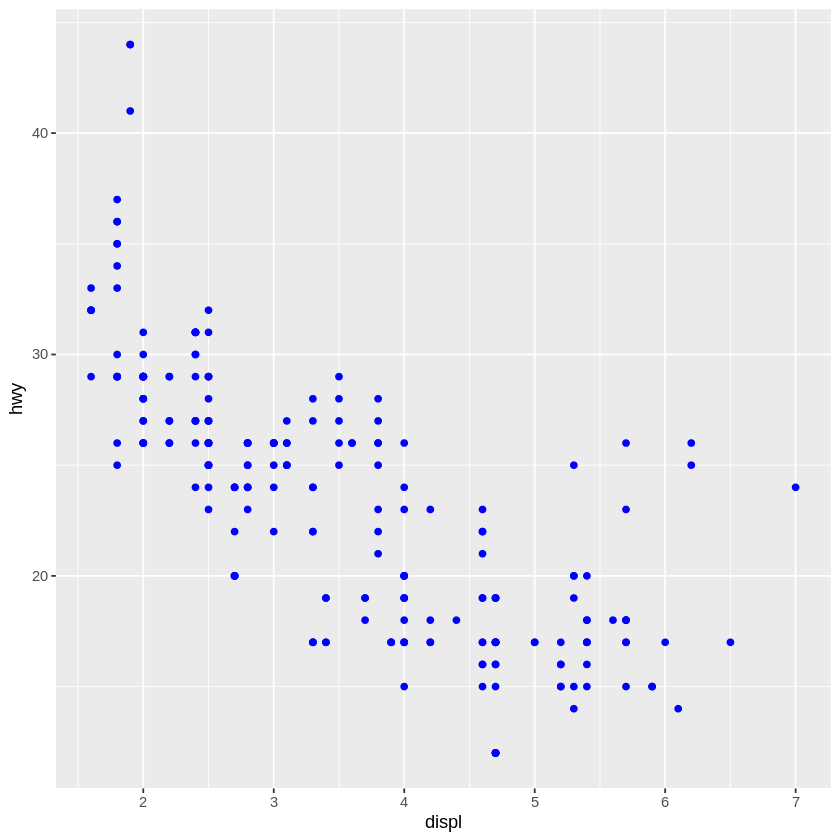

In [37]:
mpg %>%
ggplot(aes(x = displ, y = hwy)) +
  geom_point(color = 'blue')

In [ ]:
# y si queremos color azul?


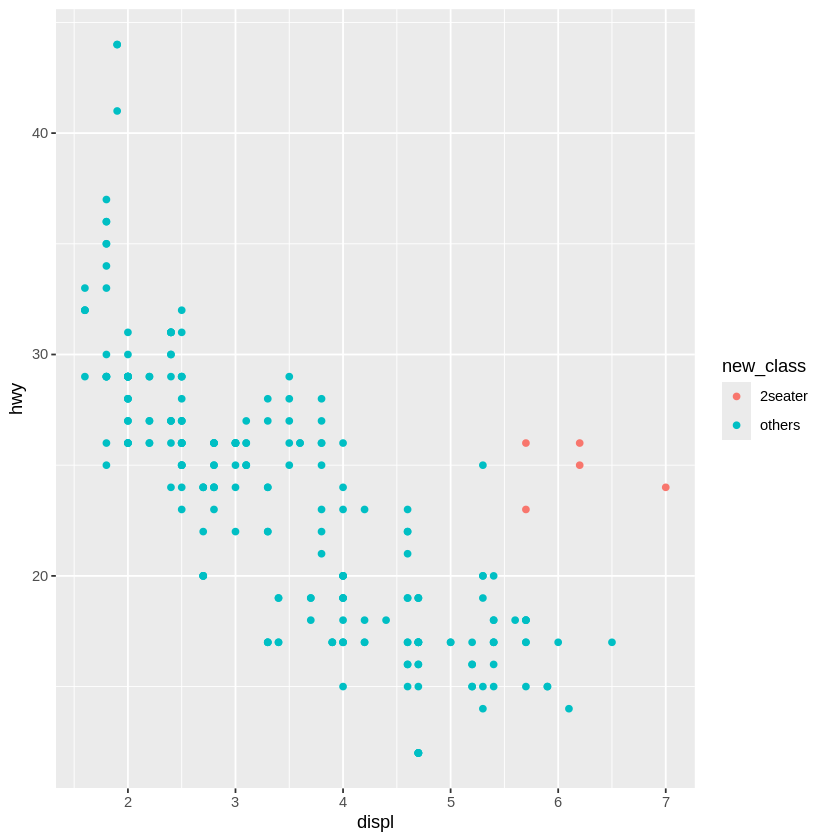

In [41]:
# Que pasa si queremos colorear en negro solo los de class "2seater"

mpg %>%
  mutate(new_class = case_when(class == "2seater" ~ "2seater",
                               T ~ "others"  )) %>%
ggplot( aes(x = displ, y = hwy , color = new_class) ) +
geom_point()


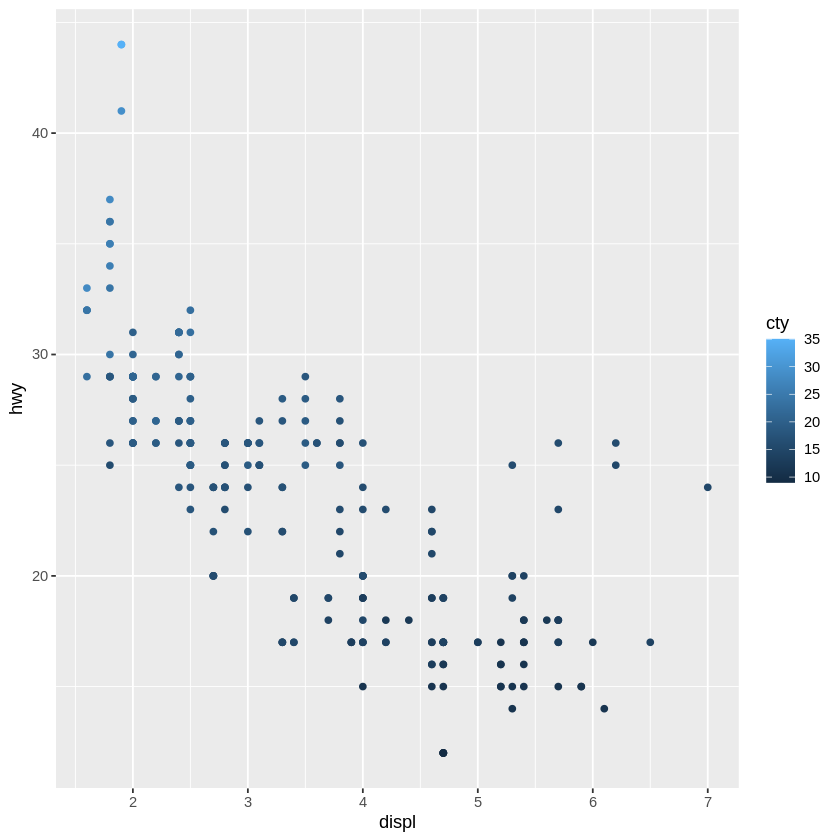

In [42]:

# que sucede si el color no es una variable discreta (categórica)
mpg %>%
ggplot( aes(x = displ, y = hwy , color = cty) ) +
geom_point()


In [ ]:
# Modificar la escala de colores y dar la impresión de "intensidad"


## I.2. Forma

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many of them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


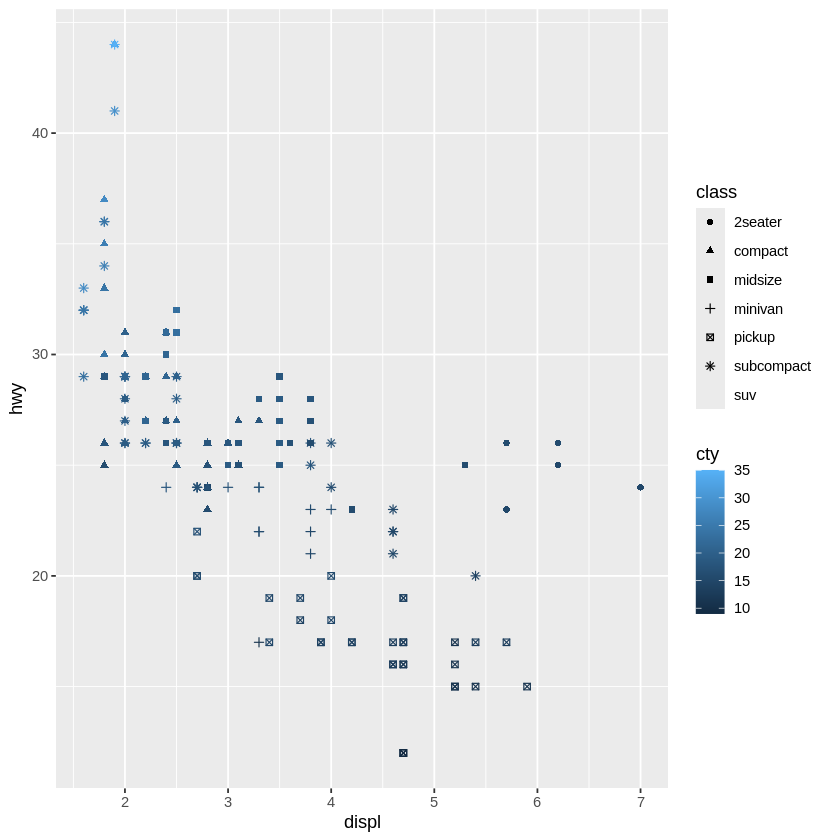

In [44]:
## Forma (shape) según "drv"
mpg %>%
ggplot( aes(x = displ, y = hwy , shape = class, color = cty) ) +
geom_point()

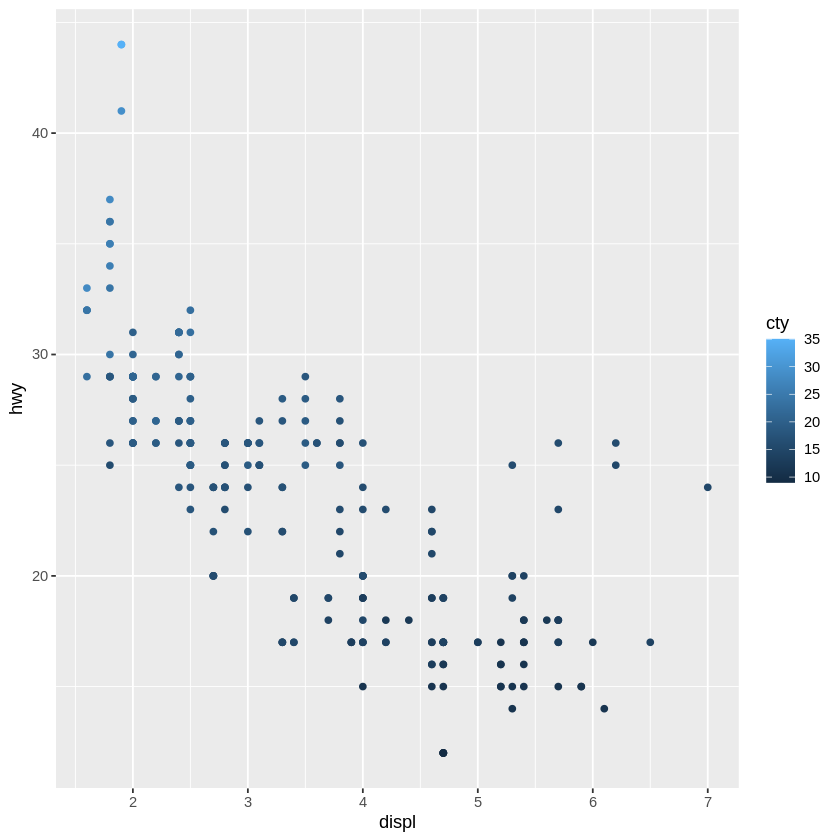

In [51]:
# El parámetro alpha permite regular la intensidad el color en función de la densidad de los puntos.
mpg %>%
ggplot( aes(x = displ, y = hwy , color = cty) ) +
geom_point()

In [54]:
aleatorio <- data.frame(x = rnorm(5000), y = rnorm(5000))

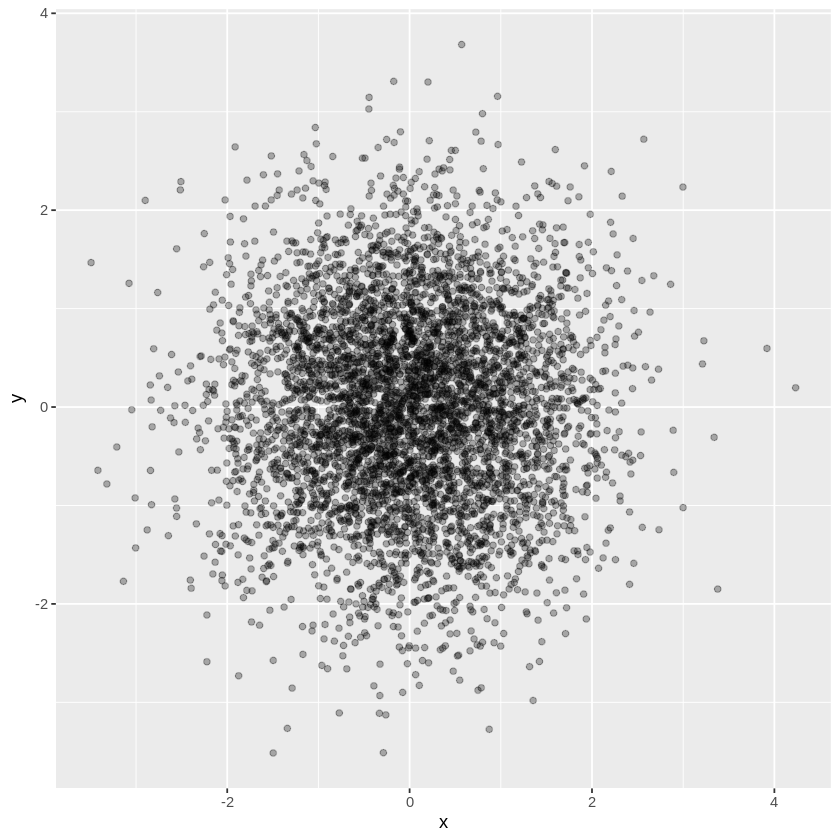

In [57]:
aleatorio %>%
  ggplot(aes(x, y)) +
  geom_point(alpha = 0.3)

## I.3. Forma y color

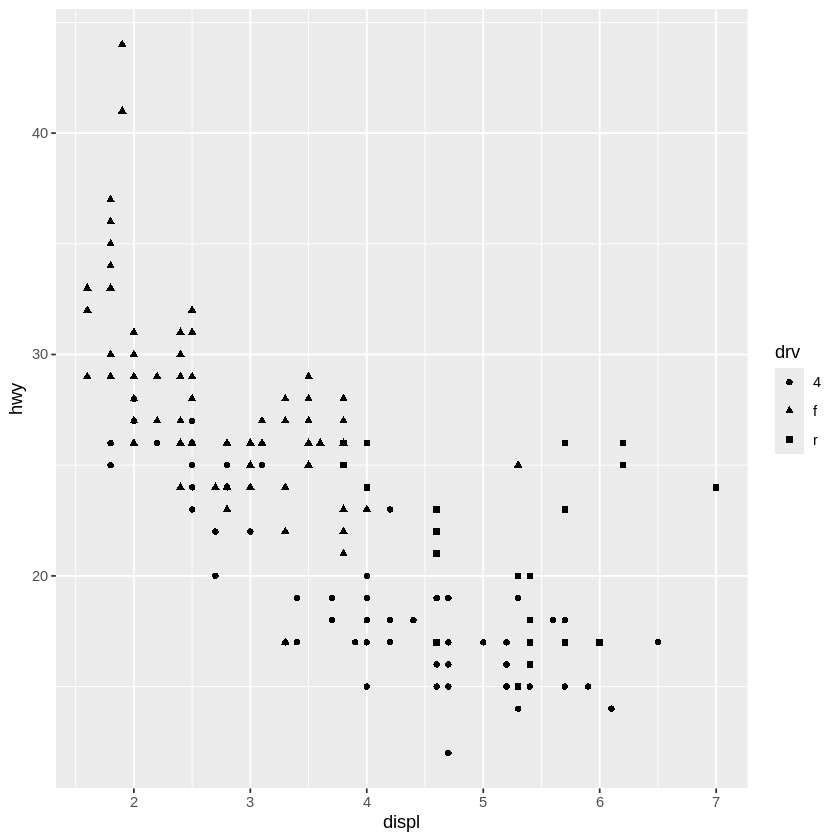

In [58]:
## Forma y color (color = class, shape = drv)
mpg %>%
ggplot( aes(x = displ, y = hwy , olor = class, shape = drv) ) +
geom_point()

## I.4. Tamaño

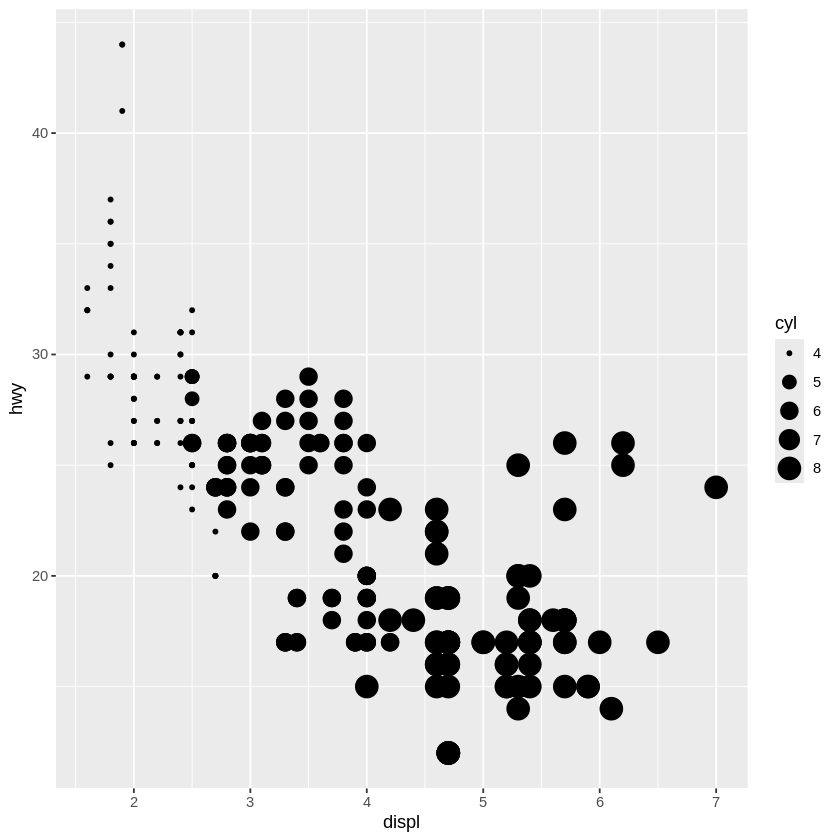

In [59]:
## Tamaño (size) según "cyl"
mpg %>%
ggplot( aes(x = displ, y = hwy , size = cyl) ) +
geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


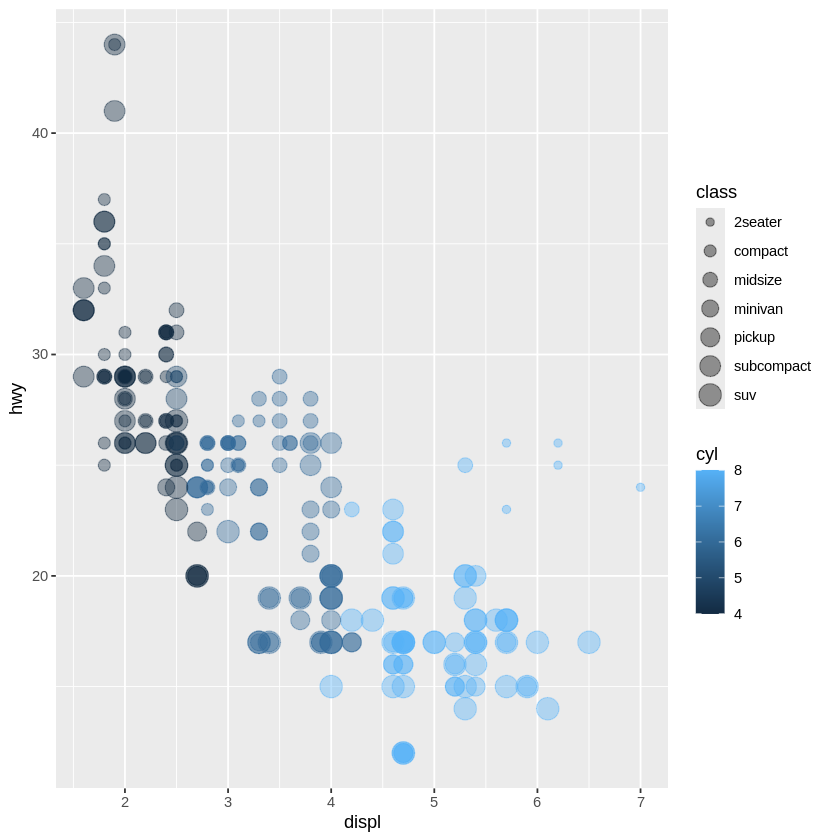

In [62]:
## Tamaño (size) según "cyl"
mpg %>%
ggplot( aes(x = displ, y = hwy , size = class, color = cyl) ) +
geom_point(alpha = 0.4)

In [ ]:
# size = drv? nota: no tiene sentido dar el tamaño según una variable categórica (R internamente la ordena alfabéticamente y luego asigna el valor del tamaño)


# II. Facetas

En inglés Facetting, es una manera de dividir la data disponible según variables categóricas y mostrar el mismo gráfico por cada categoría en una misma imagen.

https://ggplot2.tidyverse.org/reference/facet_wrap.html

Warning message:
“Using size for a discrete variable is not advised.”


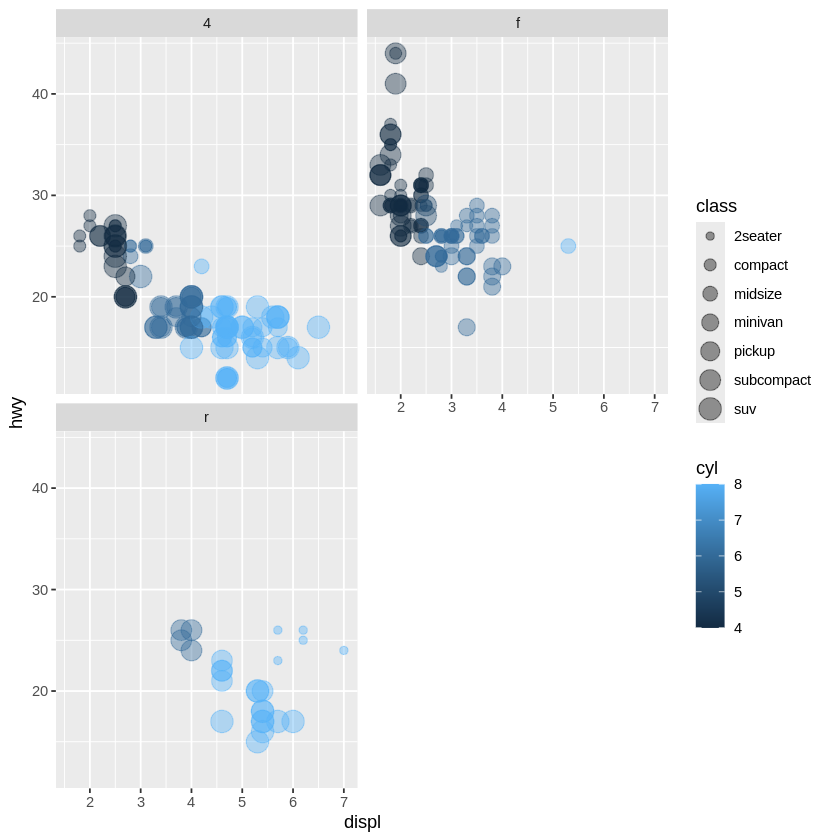

In [68]:
# Apertura por drv

mpg %>%
ggplot( aes(x = displ, y = hwy , size = class, color = cyl) ) +
geom_point(alpha = 0.4) +
  facet_wrap(~drv, nrow = 2, ncol = 2)


Warning message:
“Using size for a discrete variable is not advised.”


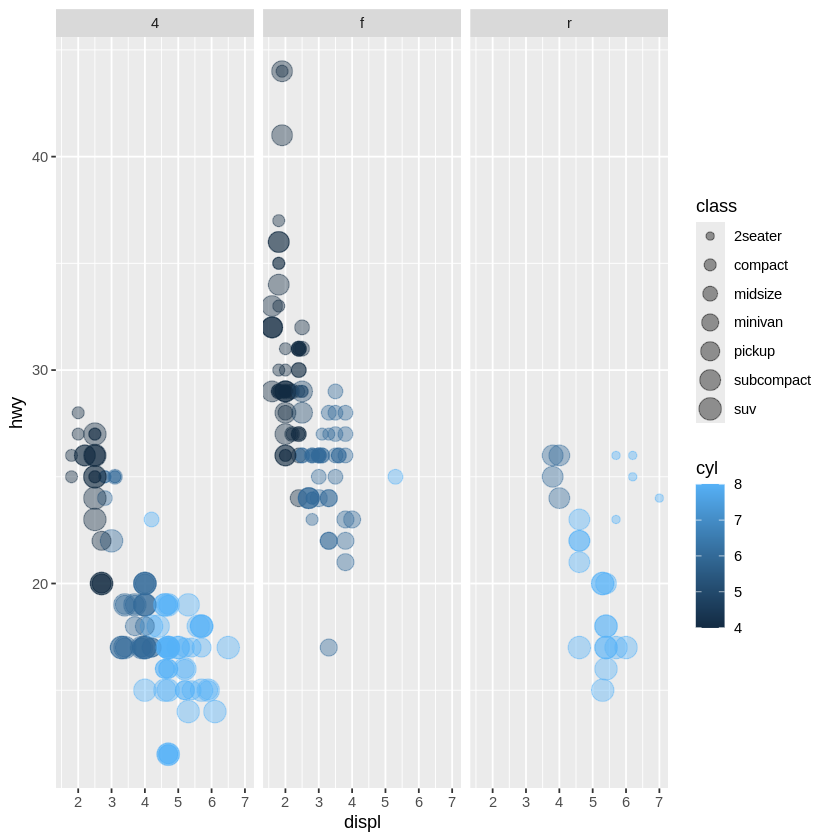

In [65]:
mpg %>%
ggplot( aes(x = displ, y = hwy , size = class, color = cyl) ) +
geom_point(alpha = 0.4) +
  facet_grid(~ drv)

Grafique otras relaciones entre la eficiencia (hwy o cty), tamaño del motor (displ) por cada  número de cilindros (cyl). ¿Qué se observa?

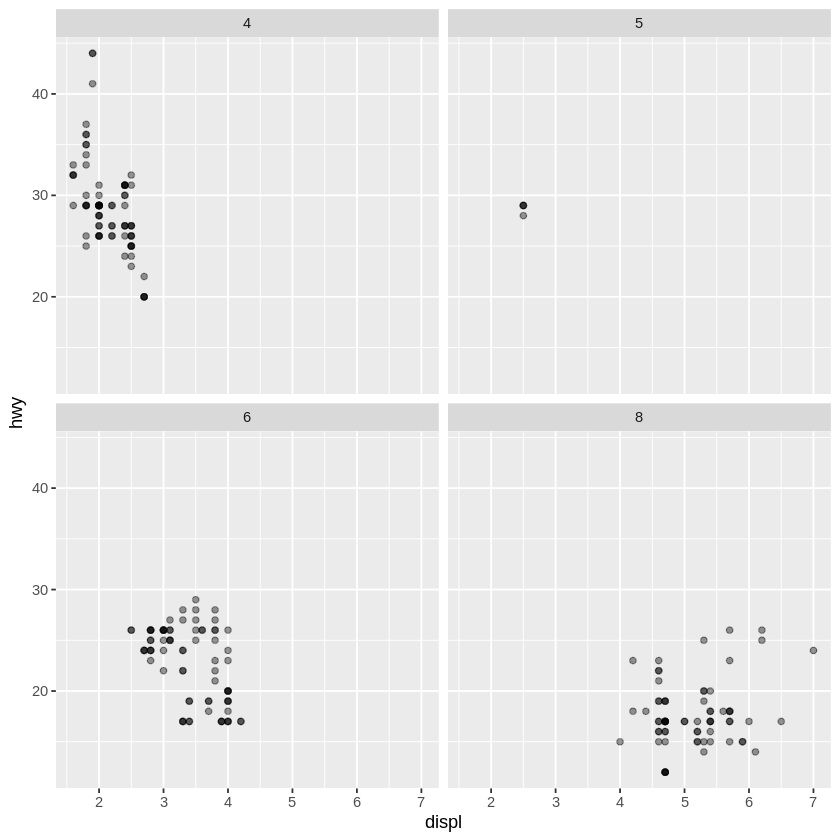

In [69]:
# Por ejemplo, x=displ,y=hwy , aperturado por número de cilindros


mpg %>%
ggplot( aes(x = displ, y = hwy ) ) +
geom_point(alpha = 0.4) +
facet_wrap(~cyl, nrow = 2, ncol = 2)


# III. Capas geométricas: prefijo geom_

Hasta aquí hemos utilizado sólo una de las diversas maneras de mostrar (geométricamente hablando) la relación entre las variables hasta aquí descritas.
En ggplot existe una gran variedad de funciones "geom_", sólo veremos algunas de ellas, aunque en la documentación oficial se describen todas las opciones disponibles https://ggplot2.tidyverse.org/index.html

## III.1 geom_point()

La fución geom_point() se encarga de visualizar las variables definidas en aes() como un gráfico de dispersión.

## III.2 geom_smooth()
Con esta función podemos añadir una curva de tendencia a nuestros datos


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


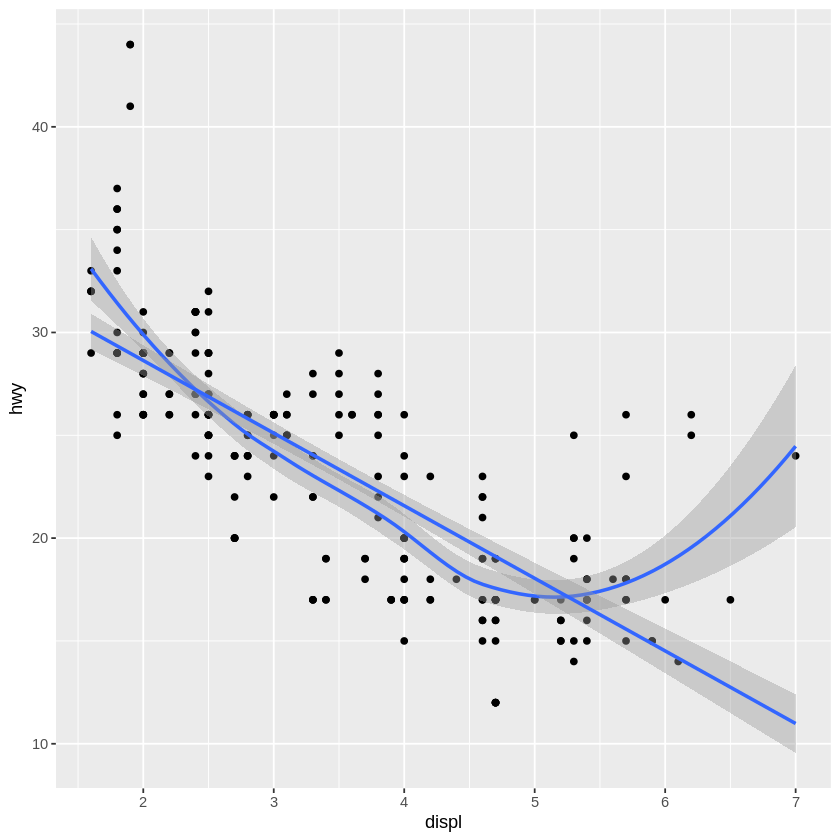

In [77]:
#geom_smooth()

mpg %>%
  ggplot(aes(x = displ, y = hwy ) ) +
  geom_point() +
  #geom_smooth(method = 'lm') +
      geom_smooth(method = 'loess') +
      geom_smooth(method = 'glm')


`geom_smooth()` using formula = 'y ~ x'


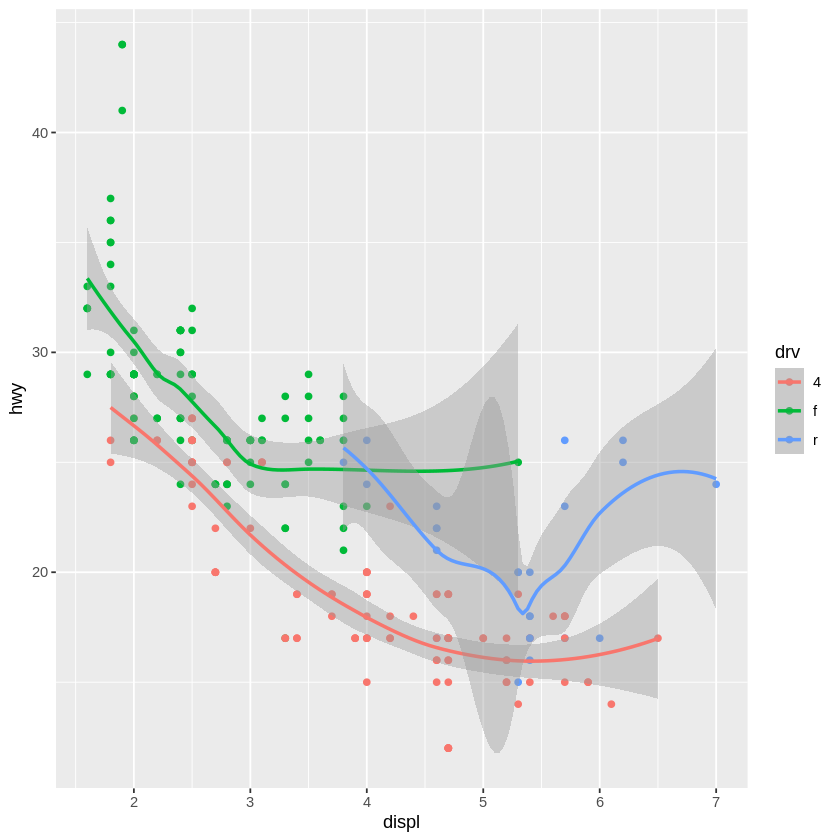

In [79]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = drv ) ) +
  geom_point() +
      geom_smooth(method = 'loess')


`geom_smooth()` using formula = 'y ~ x'


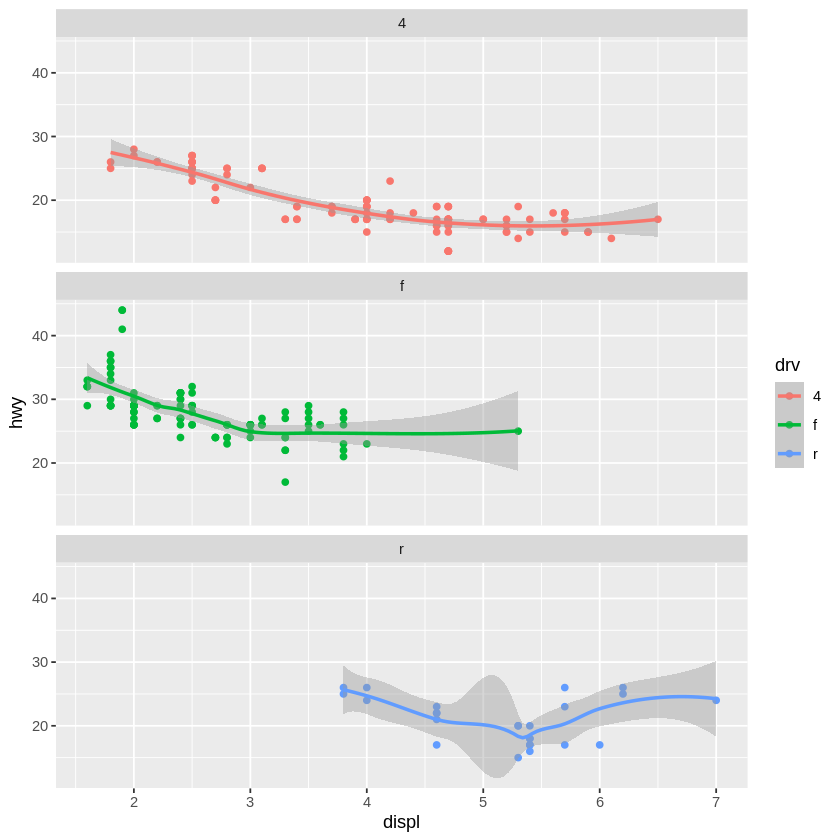

In [116]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = drv ) ) +
  geom_point() +
      geom_smooth(method = 'loess') +
        facet_wrap(~drv, ncol = 1)

¿Cómo podemos graficar las curvas de tendencia para cada tipo de tracción (drv)?

## III.3 geom_boxplot() y geom_jitter()
 Podemos variar la forma del gráfico modificando la capa geométrica con las funciones geom_
 Por ejemplo, hace un rato visualizamos la relación entre hwy y drv. Para este tipo de relaciones es más informativo un gráfico de cajas.

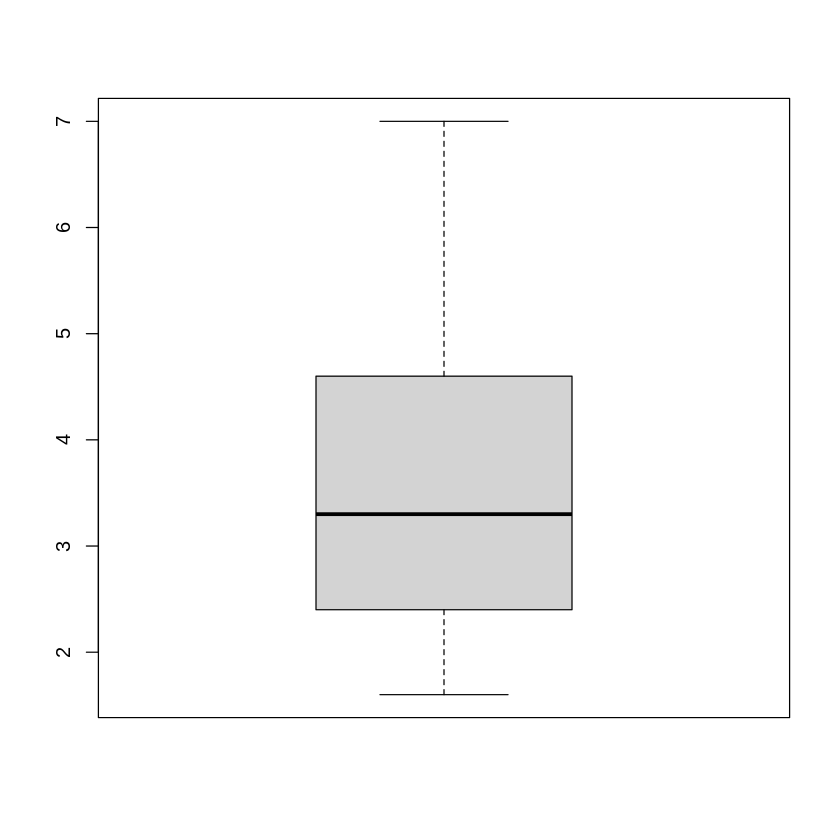

In [80]:
#geom_boxplot
boxplot(mpg$displ)


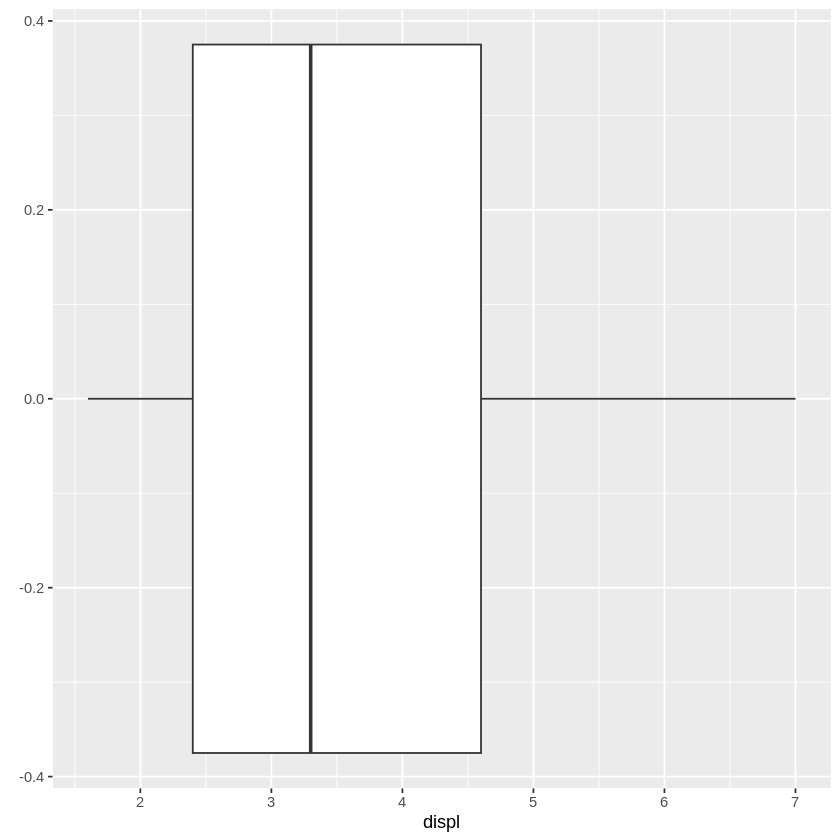

In [81]:
mpg %>%
  ggplot(aes(x = displ)) +
  geom_boxplot()

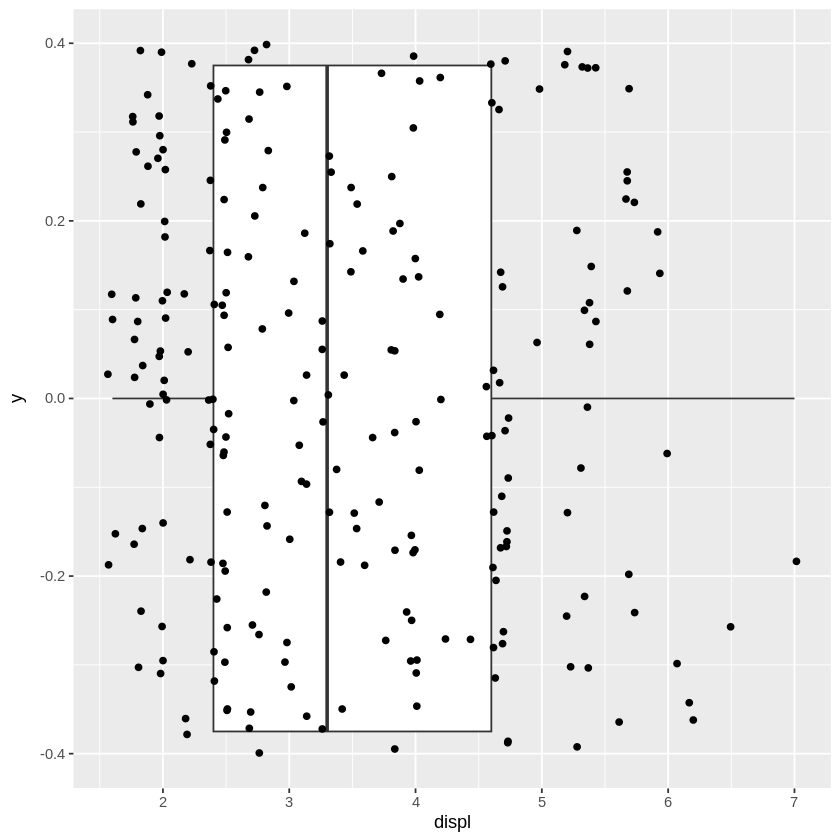

In [86]:
#geom_jitter
mpg %>%
  ggplot(aes(x = displ, y = 0)) +
  geom_boxplot() +
  geom_jitter()

## III.4 geom_histogram() y  geom_freqpoly()

Con estas funciones es posible graficar histogramas y la frecuencia absoluta a través de una curva poligonal

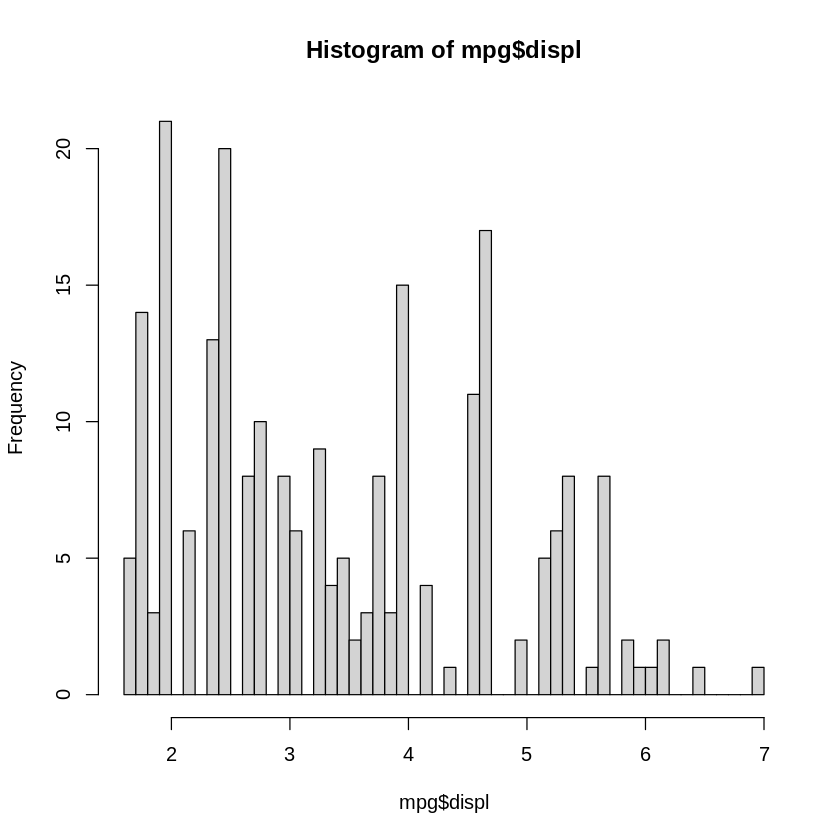

In [100]:
#con base
hist( mpg$displ, breaks = 50)


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


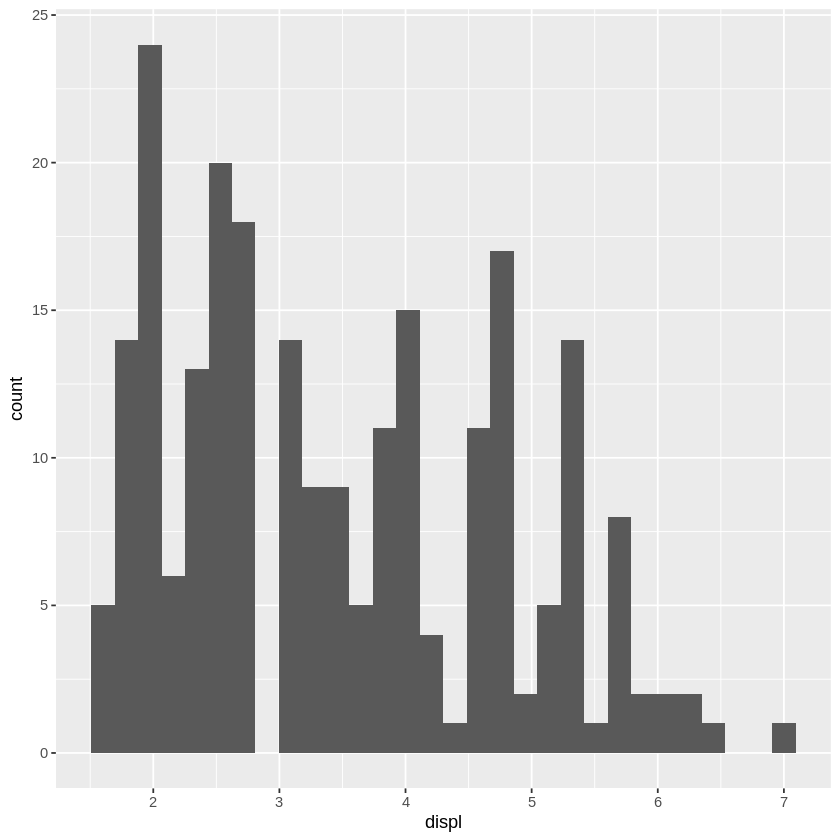

In [104]:
#con ggplot

mpg %>%
  ggplot(aes(x = displ)) +
  geom_histogram()


In [106]:
mpg %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


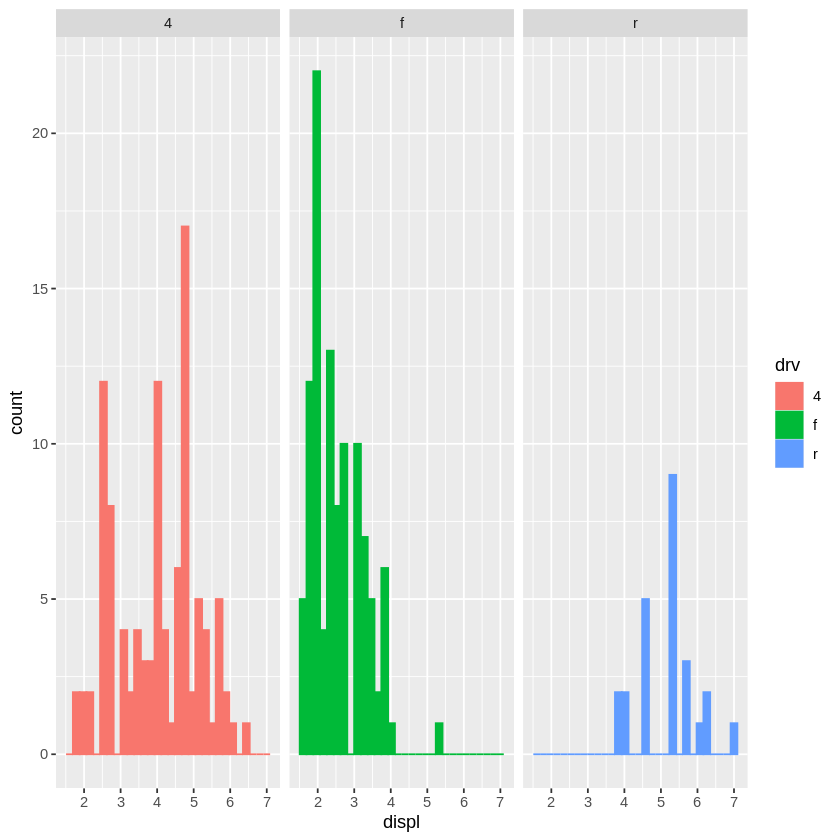

In [112]:
# podemos aperturar por drv (en color  y fill)
mpg %>%
  ggplot(aes(x = displ, color = drv, fill = drv)) +
  geom_histogram() +
    facet_grid(~drv)


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


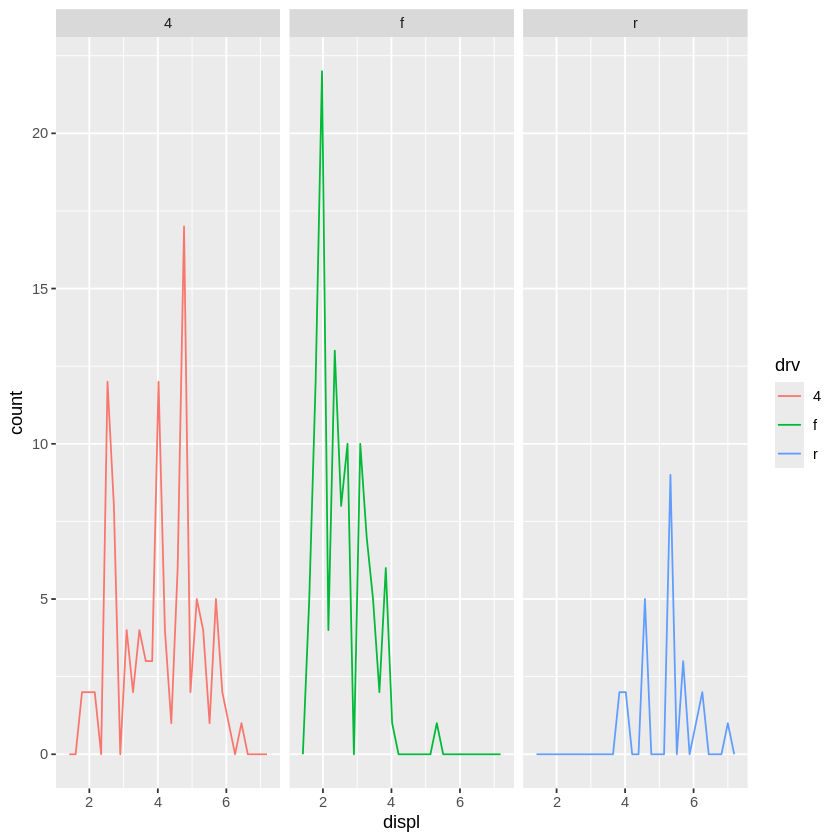

In [118]:
## polígono de frecuencias # geom_freqpoly

mpg %>%
  ggplot(aes(x = displ, color = drv, fill = drv)) +
  geom_freqpoly() +
    facet_wrap(~drv)


## III.4 geom_line()

Podemos generar gráficos de linea, por ejemplo de series temporales.










In [119]:
install.packages("quantmod")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [121]:
library(quantmod)

In [122]:
getSymbols("AAPL")

[1] "AAPL"

In [124]:
class(AAPL)

[1] "xts" "zoo"

In [134]:
AAPL_df <- AAPL %>% as.data.frame()

AAPL_df$fecha <- rownames(AAPL_df)

AAPL_df %>% head()


,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,fecha
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2007-01-03,3.081786,3.092143,2.925000,2.992857,1238319600,2.513248,2007-01-03
2007-01-04,3.001786,3.069643,2.993571,3.059286,847260400,2.569034,2007-01-04
2007-01-05,3.063214,3.078571,3.014286,3.037500,834741600,2.550738,2007-01-05
2007-01-08,3.070000,3.090357,3.045714,3.052500,797106800,2.563335,2007-01-08
2007-01-09,3.087500,3.320714,3.041071,3.306071,3349298400,2.776271,2007-01-09
2007-01-10,3.383929,3.492857,3.337500,3.464286,2952880000,2.909131,2007-01-10


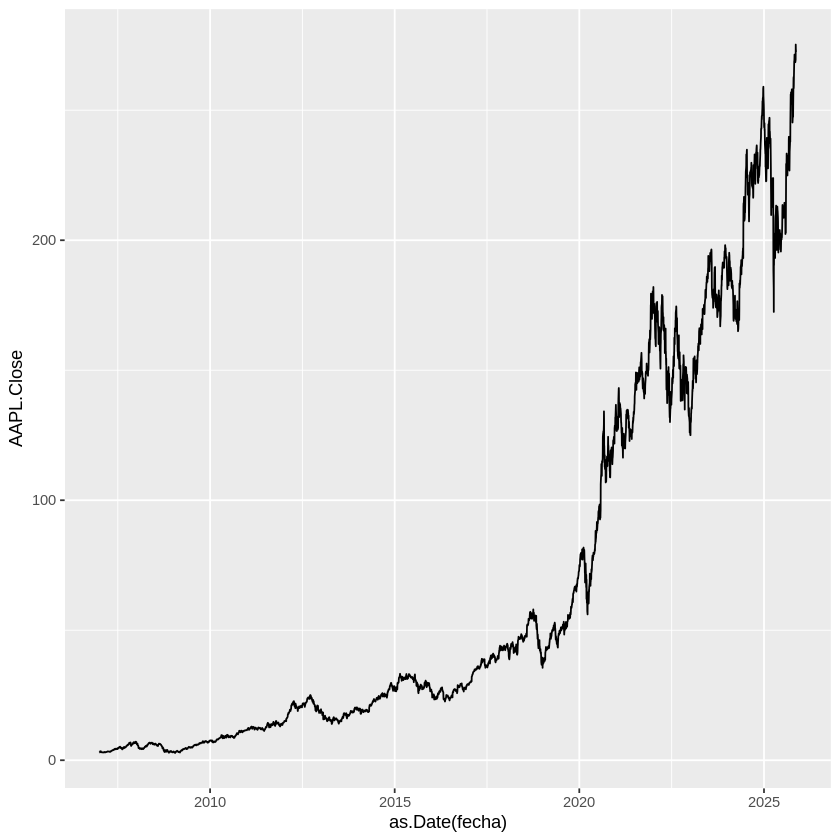

In [130]:
AAPL_df %>%
  ggplot(aes(as.Date(fecha), AAPL.Close)) +
  geom_line()

In [135]:
getSymbols( "GOOGL")

[1] "GOOGL"

In [136]:
GOOGL_df <- GOOGL %>% as.data.frame()

GOOGL_df$fecha <- rownames(GOOGL_df)

GOOGL_df %>% head()

,GOOGL.Open,GOOGL.High,GOOGL.Low,GOOGL.Close,GOOGL.Volume,GOOGL.Adjusted,fecha
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2007-01-03,11.66166,11.92843,11.53929,11.70145,307951740,11.62130,2007-01-03
2007-01-04,11.73674,12.11086,11.72047,12.09359,315188496,12.01075,2007-01-04
2007-01-05,12.07458,12.19970,11.96472,12.19194,274609116,12.10843,2007-01-05
2007-01-08,12.20445,12.25901,12.06707,12.10160,189985824,12.01871,2007-01-08
2007-01-09,12.14840,12.21847,12.04204,12.14965,215040744,12.06643,2007-01-09
2007-01-10,12.12287,12.35110,12.06306,12.24875,238501260,12.16485,2007-01-10


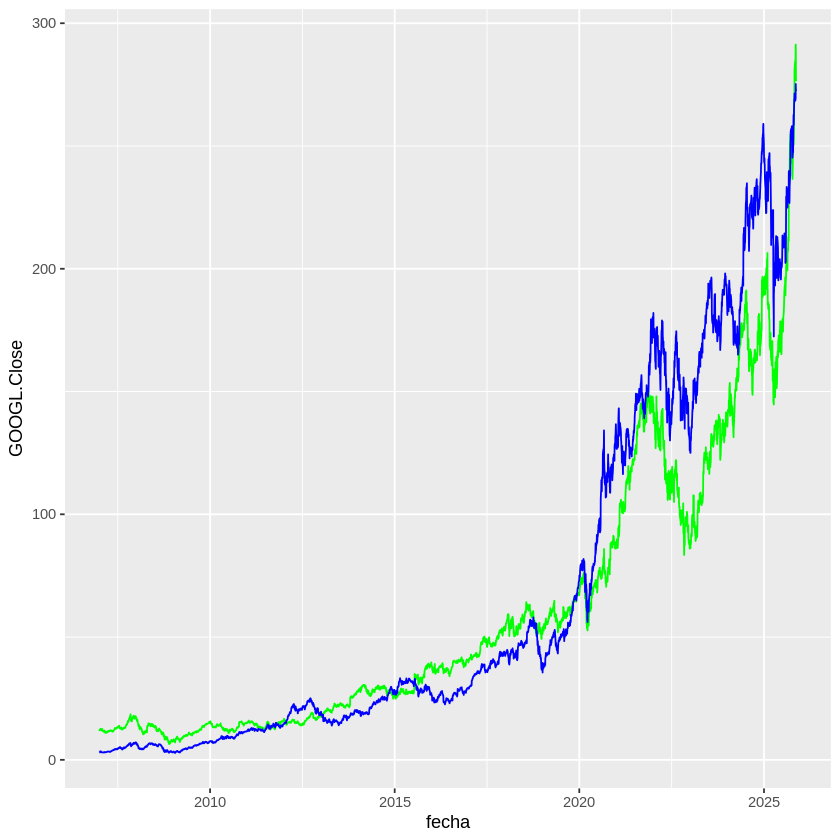

In [146]:
AAPL_df %>%
  full_join(GOOGL_df,  by = c("fecha")) %>%
  select(fecha, AAPL.Close, GOOGL.Close) %>%
    mutate(fecha = as.Date(fecha)) %>%
    ggplot() +
    geom_line(aes(fecha, GOOGL.Close), color = 'green') +
    geom_line(aes(fecha, AAPL.Close), color = 'blue')

In [148]:
wide_table <- AAPL_df %>%
  full_join(GOOGL_df,  by = c("fecha")) %>%
  select(fecha, AAPL.Close, GOOGL.Close) %>%
    mutate(fecha = as.Date(fecha))

In [149]:
wide_table %>% head()

,fecha,AAPL.Close,GOOGL.Close
,<date>,<dbl>,<dbl>
1,2007-01-03,2.992857,11.70145
2,2007-01-04,3.059286,12.09359
3,2007-01-05,3.037500,12.19194
4,2007-01-08,3.052500,12.10160
5,2007-01-09,3.306071,12.14965
6,2007-01-10,3.464286,12.24875


In [150]:
library(tidyr)

In [153]:
names(wide_table)

[1] "fecha"       "AAPL.Close"  "GOOGL.Close"

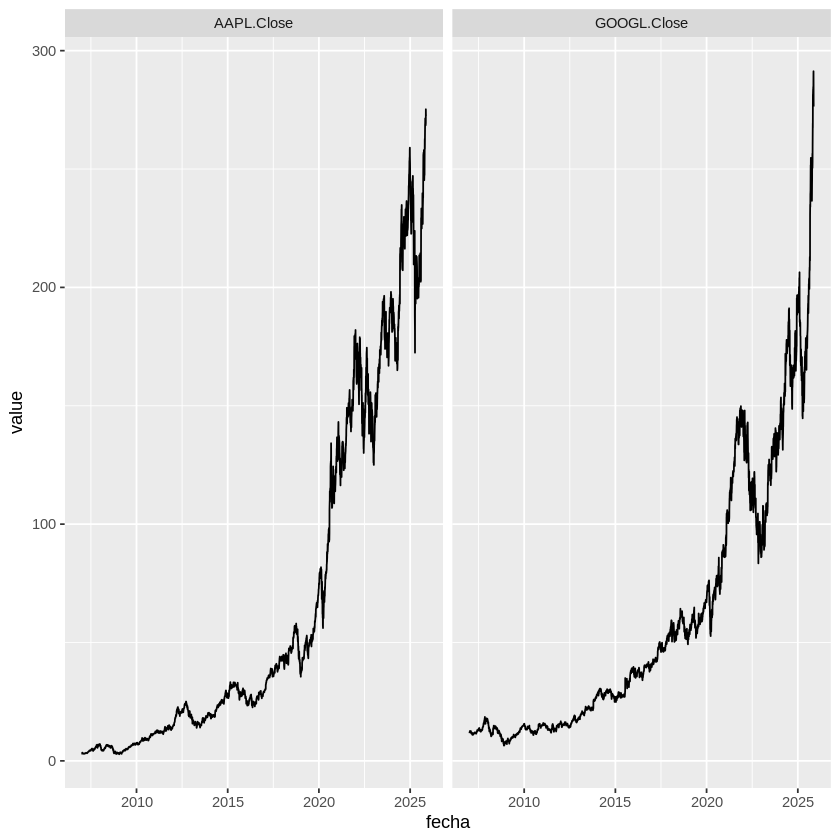

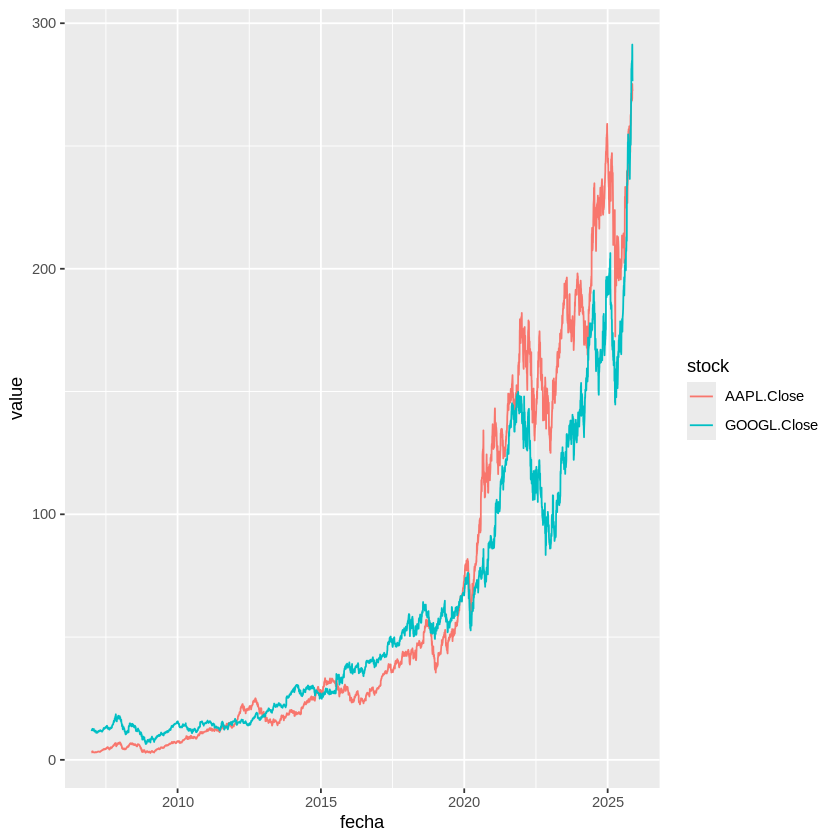

In [165]:
wide_table %>%
  #pivot_longer(!fecha, names_to = 'stock')
  pivot_longer(AAPL.Close:GOOGL.Close, names_to = 'stock') %>%
    ggplot(aes(fecha, value)) +
    geom_line() +
    facet_grid(~stock)

  wide_table %>%
  #pivot_longer(!fecha, names_to = 'stock')
  pivot_longer(AAPL.Close:GOOGL.Close, names_to = 'stock') %>%
    ggplot(aes(fecha, value, color = stock)) +
    geom_line()


# IV. Otros parámetros visuales
## IV.1 Etiquetas
Con la capa llamada `labs()`, podemos modificar los nombres de los ejes, títulos, subtítulos y leyenda.



In [167]:
?xlab

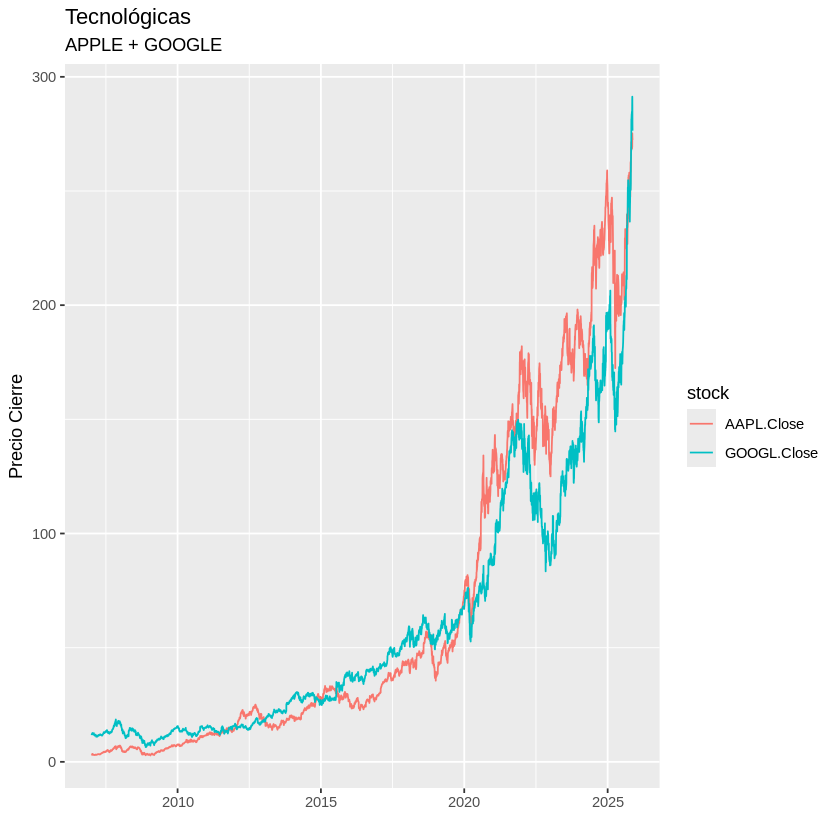

In [172]:
  wide_table %>%
  #pivot_longer(!fecha, names_to = 'stock')
  pivot_longer(AAPL.Close:GOOGL.Close, names_to = 'stock') %>%
    ggplot(aes(fecha, value, color = stock)) +
    geom_line() +
    xlab("") +
    ylab("Precio Cierre") +
      ggtitle("Tecnológicas", subtitle = "APPLE + GOOGLE")


## IV.2 Ejes y escala
Existen diversas funciones que nos peritirán modificar parámetros visuales de los ejes, en función del tipo de dato que estos representen. Algunos de los más usuales son los siguientes
 * `scale_x_date()`, `scale_y_date()`
 * `scale_x_continuous()`, `scale_y_continuous()`
 * `scale_x_discrete()`, `scale_y_discrete()`
 * `scale_x_log10()`, `scale_y_log10()`

En la documentación pueden buscar las demmás opcione mediante el prefijo _scale_


In [175]:
?scale_x_date()

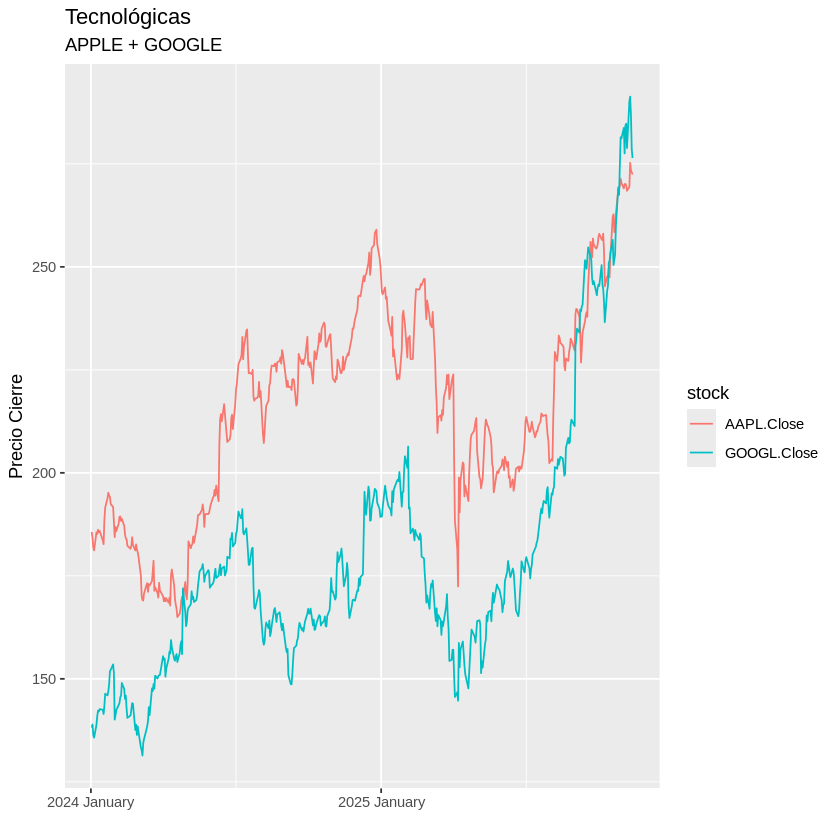

In [180]:
  wide_table %>%
  #pivot_longer(!fecha, names_to = 'stock')
  pivot_longer(AAPL.Close:GOOGL.Close, names_to = 'stock') %>%
    filter(fecha >= '2024-01-01') %>%
    ggplot(aes(fecha, value, color = stock)) +
    geom_line() +
    xlab("") +
    ylab("Precio Cierre") +
      ggtitle("Tecnológicas", subtitle = "APPLE + GOOGLE") +
        scale_x_date(date_breaks = "1 year", date_labels = "%Y %B")




# Guardar un gráfico en el directorio local
Podemos guardar nuestros gráficos en un  directorio local con funciones propias de ggplot2.
```
ggsave(
  filename,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
  create.dir = FALSE,
  ...
)
```

In [182]:
  p1 <- wide_table %>%
  #pivot_longer(!fecha, names_to = 'stock')
  pivot_longer(AAPL.Close:GOOGL.Close, names_to = 'stock') %>%
    filter(fecha >= '2024-01-01') %>%
    ggplot(aes(fecha, value, color = stock)) +
    geom_line() +
    xlab("") +
    ylab("Precio Cierre") +
      ggtitle("Tecnológicas", subtitle = "APPLE + GOOGLE") +
        scale_x_date(date_breaks = "1 year", date_labels = "%Y %B")


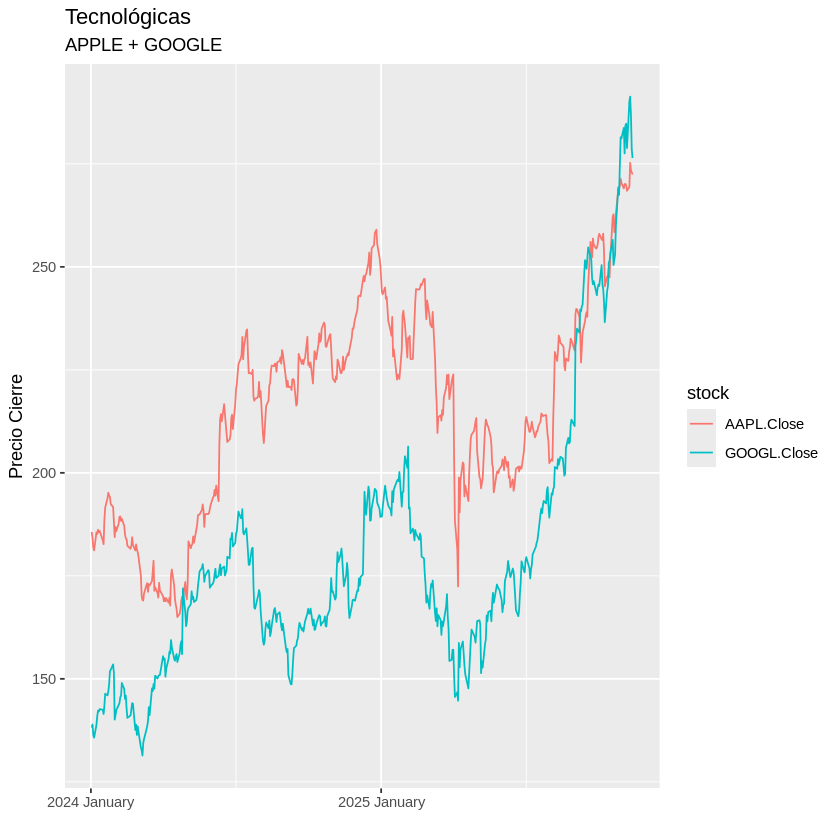

In [183]:
p1

In [184]:
ggsave(filename = "stocks.png",
        plot = p1)

Saving 6.67 x 6.67 in image


# Ejercicios



### 1. Fundamentos de `ggplot2`
1. Crea un **scatter plot** de `mpg` con `displ` (eje x) vs `hwy` (eje y).
2. Agrega color por `class` y tamaño por `cyl`.
3. Cambia el **tema** a `theme_minimal()` y agrega un **título** y **subtítulo**.
4. Ajusta la **transparencia** (`alpha`) para evitar sobreposición.

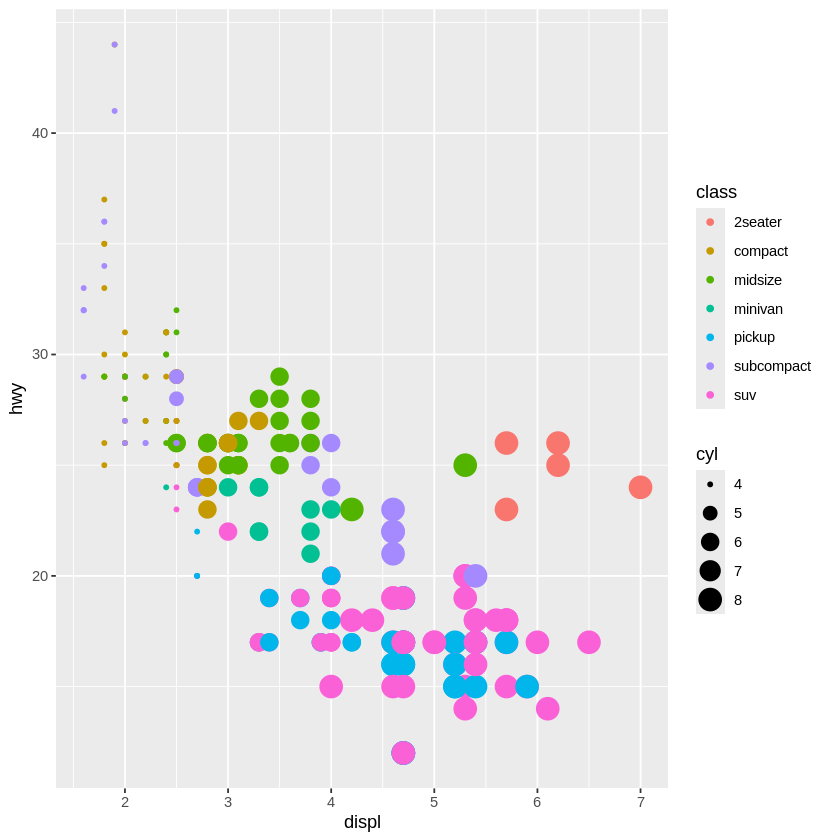

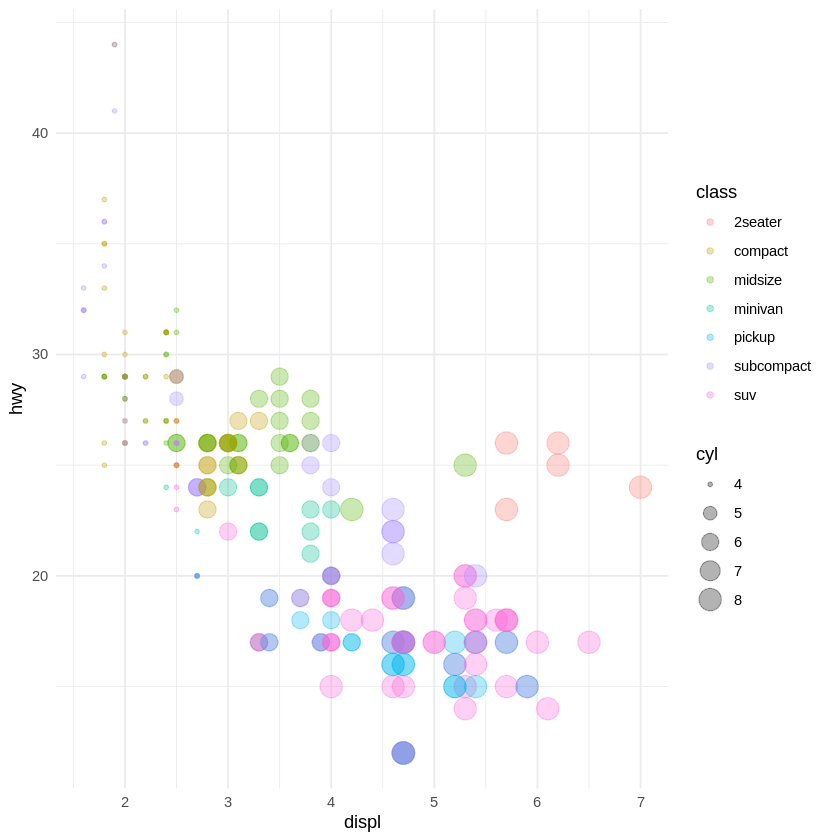

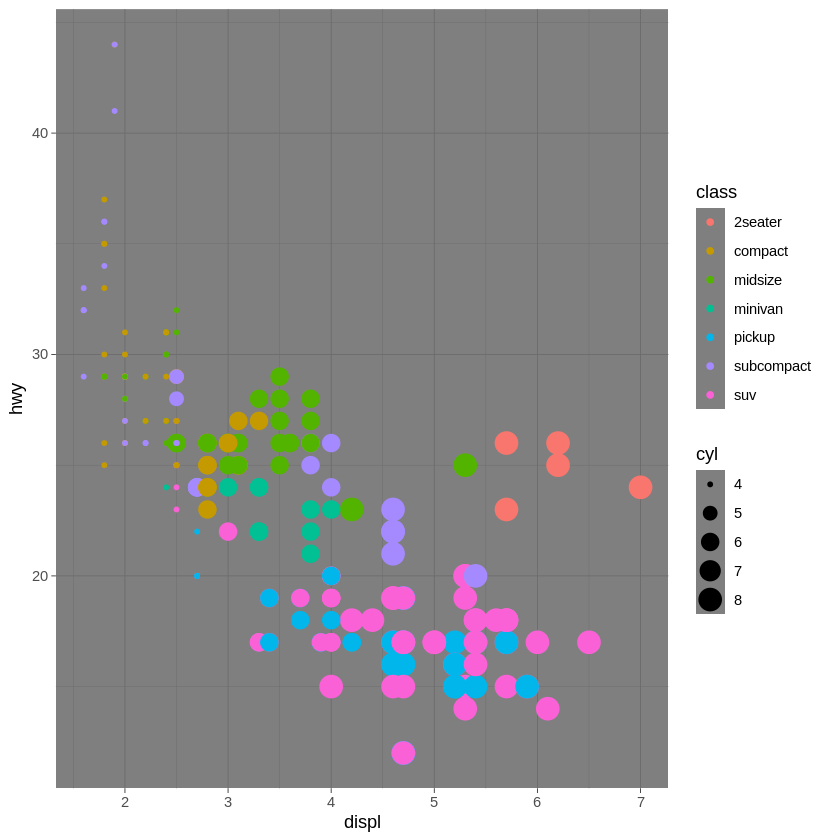

In [191]:
mpg %>%
  ggplot(aes(displ, hwy, color = class, size = cyl)) +
  geom_point()

mpg %>%
  ggplot(aes(displ, hwy, color = class, size = cyl)) +
  geom_point(alpha = 0.3) +
  theme_minimal()

mpg %>%
  ggplot(aes(displ, hwy, color = class, size = cyl)) +
  geom_point() +
  theme_dark()




### 2. Mapear estéticas vs fijarlas manualmente
1. Crea un gráfico de puntos `displ` vs `cty` y **mapea** `color` a `manufacturer`.
2. Crea el mismo gráfico pero con `color = 'steelblue'` **fijo** (no mapeado). ¿Qué cambia en el código y en la leyenda?
3. Agrega `shape` mapeado a `drv` y comenta el resultado.

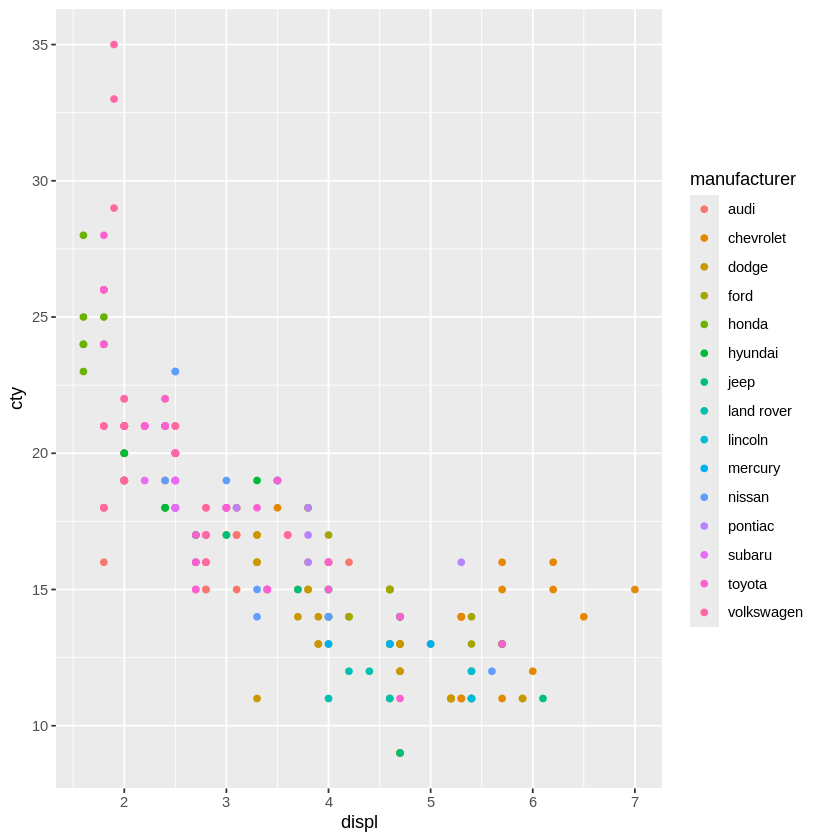

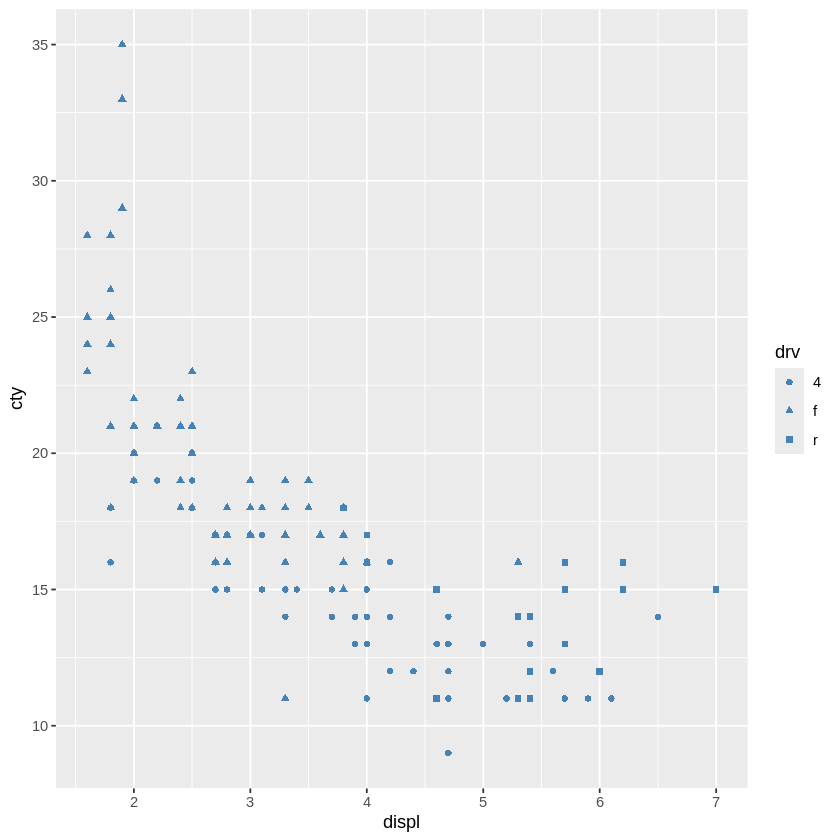

In [195]:
mpg %>%
  ggplot(aes(displ, cty, color = manufacturer)) +
  geom_point()


mpg %>%
  ggplot(aes(displ, cty, shape = drv)) +
  geom_point(color = 'steelblue')


### 3. Facetas
1. Usa `facet_wrap(~ class)` para comparar `displ` vs `hwy` por tipo de auto.
2. Cambia a `facet_grid(drv ~ cyl)` y describe cuándo preferir `wrap` vs `grid`.
3. Ajusta `scales = 'free_y'` y explica su efecto.

In [201]:
?facet_wrap

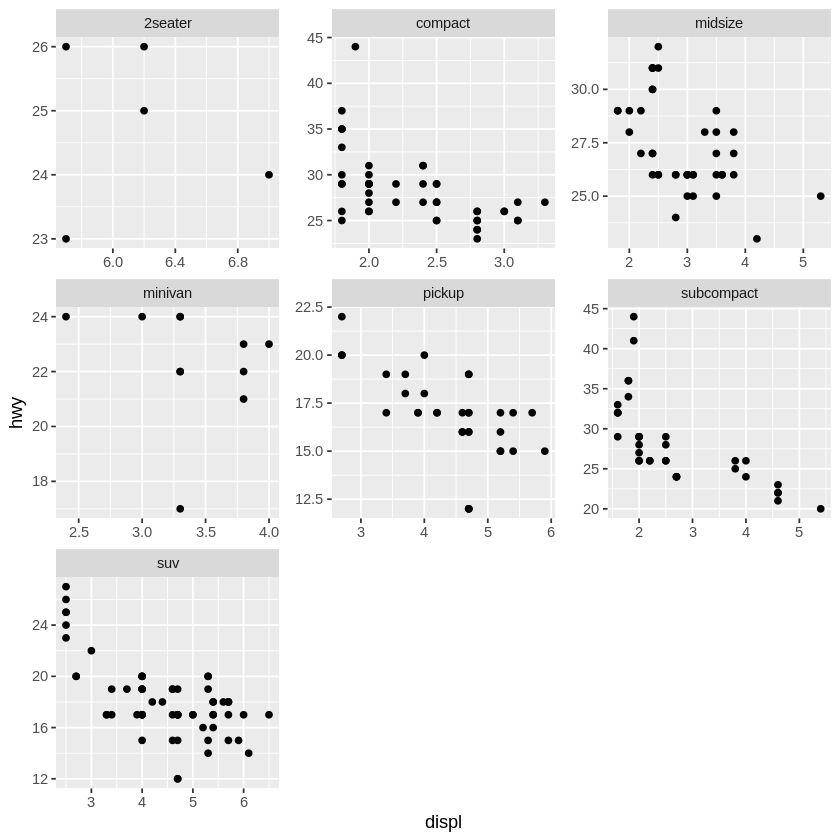

In [202]:
mpg %>%
  ggplot(aes(displ, hwy)) +
  geom_point() +
  facet_wrap(~ class, scales = 'free')

`geom_smooth()` using formula = 'y ~ x'


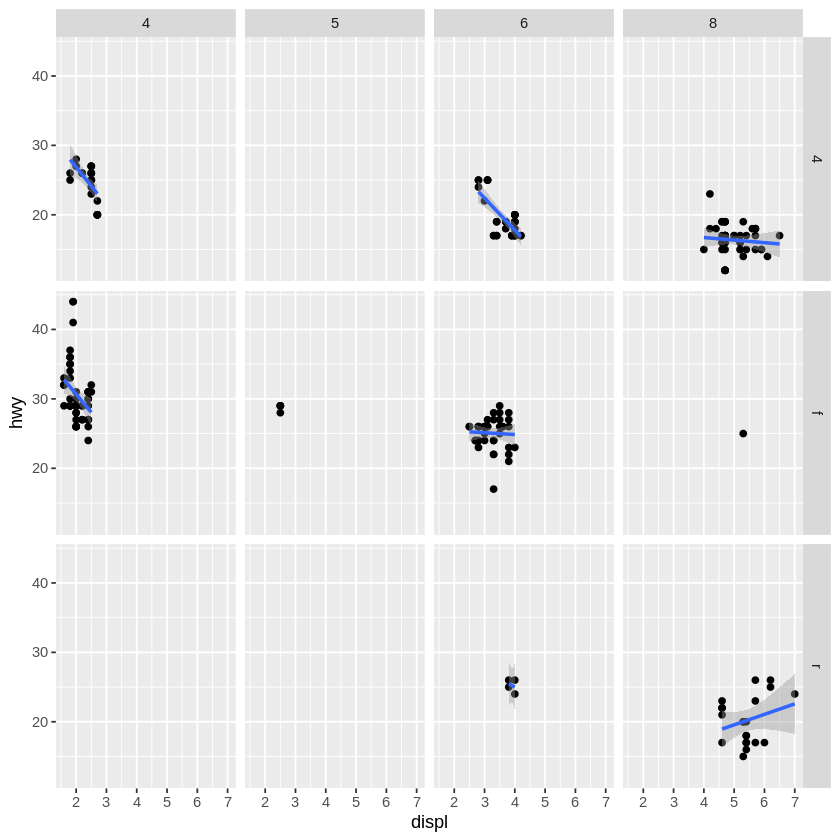

In [207]:
mpg %>%
  ggplot(aes(displ, hwy)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  facet_grid(drv ~ cyl)

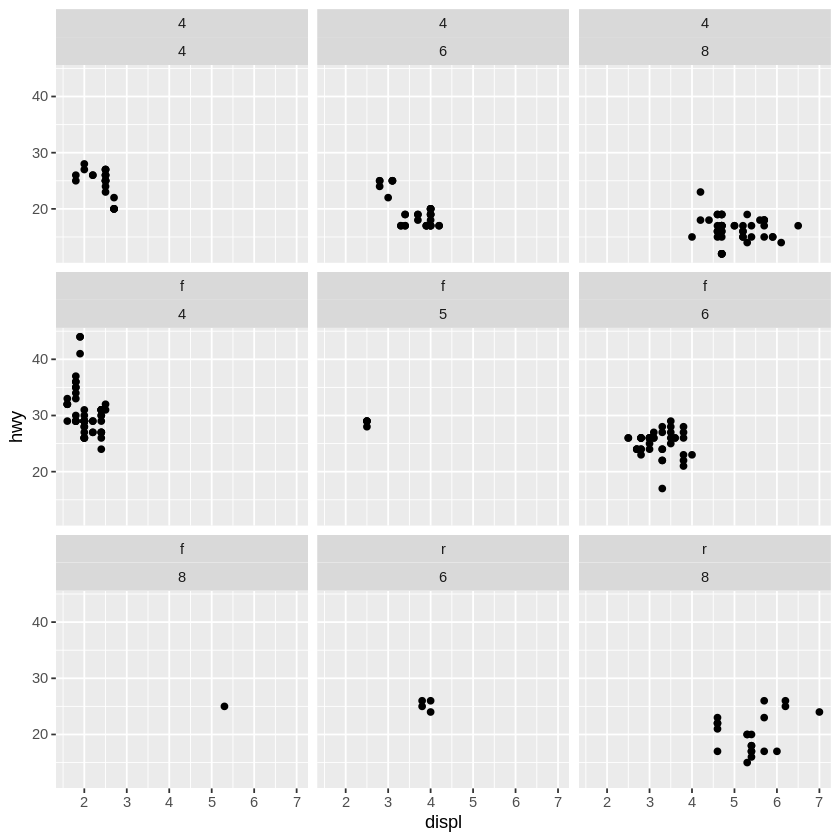

In [204]:
mpg %>%
  ggplot(aes(displ, hwy)) +
  geom_point() +
  facet_wrap(drv ~ cyl)

### 4. Geometrías y estadísticas
1. Usando `diamonds`, grafica `price` vs `carat` con `geom_point()` y luego agrega una **línea de tendencia** con `geom_smooth(method = 'lm')`.
2. Compara con `geom_smooth()` (loess por defecto). ¿Qué diferencias observas?
3. Crea un **histograma** de `price` y luego un **density plot**. Ajusta `binwidth` y `alpha`.

### 5. Escalas y guías
1. En `mpg`, crea un scatter `displ` vs `hwy` con color por `cyl`. Convierte la escala de color a un **gradiente** continuo (p. ej. `scale_color_viridis_c()` si tienes `viridis`).
2. Cambia las **etiquetas** de ejes y leyenda (`labs(x=..., y=..., color=...)`).
3. Cambia el **formato** del eje y para mostrar enteros con `scale_y_continuous(breaks = 10:45)`.

### 6. Temas y personalización
1. Reproduce un gráfico de tu preferencia y aplica tres temas distintos: `theme_minimal()`, `theme_classic()`, `theme_light()`.
2. Personaliza el título (`plot.title`), ejes (`axis.title`, `axis.text`) y posición de la leyenda (`legend.position = 'bottom'`).
3. Cambia la **fuente** de los títulos usando `theme(text = element_text(family = '...'))` si tienes fuentes instaladas.

### 7. Coordenadas y anotaciones
1. Usa `coord_flip()` en un gráfico de cajas de `hwy` por `class` y comenta cuándo es útil.
2. Usa `coord_polar()` para crear un **bar plot radial** de `class`.
3. Agrega **anotaciones** (p. ej. `annotate('text', ...)` o `geom_label()`) para destacar un punto clave.

### 8. Composición de gráficos
Antes debes cargar la librería `patchwork`:
1. Crea dos gráficos (`p1`, `p2`) y combínalos con `p1 + p2` y `p1 / p2`.
2. Ajusta anchos y altos relativos con `plot_layout(widths = c(2, 1))`.
